# Monthly Utility Bill Prediction

Programming Language: R 4.11.0 in Jupyter Notebook

R Libraries used:
- caret
- broom
- glmnet
- lattice
- ggplot2
- reshape2
- MASS
- scales
- Grid
- gridExtra
- tidyverse
- tidyr
- magrittr
- scatterplot3d
- Metrics
- dplyr
- leaps
- RColorBrewer

## Table of Contents

1. [Introduction](#sec_1)
3. [Exploratory Data Analysis](#sec_3)
3. [Methodology](#sec_4)
3. [Model Development](#sec_5)
3. [Results and discussion](#sec_6)
3. [Conclusion](#sec_7)
3. [References](#sec_8)

## 1. Introduction <a class="anchor" id="sec_1"></a>

The goal of this activity is to look at a dataset which contains information about electricity consumer households. We will use the information in this dataset to predict what the amount paid by the consumer should be. The prediction will be performed by a model which will be fit to the data. Before we load our dataset and look through it, let us load the required libraries.

### 1.1 Loading the Libraries

We can use the below code block which checks whether the specified libraries are already installed and if they are not, it installs them before loading the libraries.

In [1]:
# Specifying the required packages
packages <- c("ggplot2", "reshape2", "broom", "glmnet", "lattice", "tidyr", "caret", "MASS", 
              "scales", "grid", "gridExtra", "tidyverse", "magrittr", "scatterplot3d", "Metrics", 
              "dplyr", "leaps", "RColorBrewer")

# Installing the required packages if not installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Loading the required packages
invisible(lapply(packages, library, character.only = TRUE))

Loading required package: Matrix

Loaded glmnet 4.1-2


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


The following object is masked from ‘package:reshape2’:

    smiths


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ readr   2.1.2      ✔ stringr 1.4.1 
✔ purrr   0.3.4      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::combine()    masks gridExtra::combine()
✖ purrr::discard()    masks scales::discard()
✖ tidyr::expand()     masks Matrix::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::lift()       masks caret::lift()
✖ tidyr::pack()       masks Matrix::pack()
✖ dplyr::select()     masks MASS::select()
✖ tidyr::unpack()     masks Matrix::unpack()

Attaching package: ‘magrittr’


The f

We have been given a dataset that contains the results of a survey conducted for households. The dataset contains the following attributes:

* **num rooms**: Number of rooms in the house
* **num people**: Number of people in the house
* **housearea**: The area of the house
* **is ac**: Is there an air conditioner (AC) or more in the house
* **is TV**: Is there a TV or more in the house
* **is flat**: Is it a flat/apartment
* **avemonthlyincome**: Average monthly income of the household
* **num_children**: Number of children in the house
* **is_urban**: Is the house present in an urban
* **month**: The month index of a year
* **amount_paid**: Amount paid as monthly bill

We need to predict the monthly electricity bill contained in the attribute `amount_paid` with the help of the other attributes in the dataset.

### 1.2 Loading the Data

Before we develop a model to predict the monthly electricity bill, let us observe the dataset and the variables inside the data. We can load the data with the help of the `read.csv()` function.

In [2]:
# Importing the data from the csv file
data <- read.csv('./electricity_consumer_household.csv')

## 2. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

In this section, we are going to perform a number of data exploration activities to understand the data better. There are a number of ways in which we can observe the imported data and so let us explore it here one by one.

### 2.1. Initial Exploration

First, let us view some basic information about the data such as the attributes, their datatypes and unique values.

In [3]:
# Displaying the dimensions of the data
cat("The household data has", dim(data)[1], "records with", dim(data)[2],
    "attributes each. The structure of the dataset is given below:\n\n")

# Displaying the structure of the data
str(data)

cat("\nHere are the first few and last few records in the dataset:")

# Checking the first few records of the data
head(data)

# # Checking the last few records of the data
tail(data)

cat("\nThe summary statistics for each attribute are as follows:")

# Printing the statistical summary of the variables in the data
summary(data)

# Checking the unique values in each attribute of the data
cat("The number of unique values in each column are:")
apply(data, 2, function(x) length(unique(x)))

The household data has 1000 records with 11 attributes each. The structure of the dataset is given below:

'data.frame':	1000 obs. of  11 variables:
 $ num_rooms         : int  3 1 3 0 1 0 4 3 2 1 ...
 $ num_people        : int  3 5 1 5 8 5 5 4 4 6 ...
 $ housearea         : num  743 953 761 861 732 ...
 $ is_ac             : int  1 0 1 1 0 0 0 0 1 0 ...
 $ is_tv             : int  1 1 1 1 1 1 1 0 0 0 ...
 $ is_flat           : int  1 0 1 0 0 1 0 1 0 0 ...
 $ ave_monthly_income: num  4838 17532 11146 6070 8615 ...
 $ num_children      : int  2 1 0 0 2 2 1 2 0 2 ...
 $ is_urban          : int  0 1 0 0 1 1 1 1 1 1 ...
 $ month             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ amount_paid       : num  112.1 126.7 102.4 66.6 131.7 ...

Here are the first few and last few records in the dataset:

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,3,3,742.57,1,1,1,4837.97,2,0,1,112.0963
2,1,5,952.99,0,1,0,17532.40,1,1,1,126.6567
3,3,1,761.44,1,1,1,11146.22,0,0,1,102.3758
4,0,5,861.32,1,1,0,6069.54,0,0,1,66.5984
5,1,8,731.61,0,1,0,8615.05,2,1,1,131.6571
6,0,5,837.24,0,1,1,12330.91,2,1,1,158.6485


,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
995,2,6,816.30,0,1,1,19897.97,1,0,10,105.6904
996,3,0,991.31,0,1,0,6343.63,1,1,10,131.1740
997,2,5,847.97,0,1,0,19751.46,0,0,10,70.8945
998,2,4,660.94,1,0,0,5072.59,0,1,10,113.7321
999,1,1,814.75,0,1,1,7767.52,0,1,10,130.6847
1000,1,6,835.43,0,0,0,11102.00,0,1,10,107.5602



The summary statistics for each attribute are as follows:

   num_rooms        num_people       housearea          is_ac      
 Min.   :-1.000   Min.   :-1.000   Min.   : 244.4   Min.   :0.000  
 1st Qu.: 1.000   1st Qu.: 4.000   1st Qu.: 691.0   1st Qu.:0.000  
 Median : 2.000   Median : 5.000   Median : 790.0   Median :0.000  
 Mean   : 1.962   Mean   : 4.897   Mean   : 794.7   Mean   :0.376  
 3rd Qu.: 3.000   3rd Qu.: 6.000   3rd Qu.: 893.0   3rd Qu.:1.000  
 Max.   : 5.000   Max.   :11.000   Max.   :1189.1   Max.   :1.000  
     is_tv          is_flat      ave_monthly_income  num_children  
 Min.   :0.000   Min.   :0.000   Min.   : -788.2    Min.   :0.000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.: 9018.4    1st Qu.:0.000  
 Median :1.000   Median :0.000   Median :12371.3    Median :1.000  
 Mean   :0.798   Mean   :0.477   Mean   :12342.5    Mean   :1.078  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:15701.2    3rd Qu.:2.000  
 Max.   :1.000   Max.   :1.000   Max.   :28265.5    Max.   :4.000  
    is_urban         month       amount_paid    

The number of unique values in each column are:

num_rooms         num_people          housearea              is_ac 
                 7                 13                990                  2 
             is_tv            is_flat ave_monthly_income       num_children 
                 2                  2               1000                  5 
          is_urban              month        amount_paid 
                 2                 10               1000

We can ascertain a few things from the summarization of the data:

* We have 11 columns as described above. For the purposes of prediction, we have to consider the column `amount_paid` as the target column.
* This is the quantity to be predicted. Additionally, we can see that there are no string variables in the data. There seem to be only numerical or floating variables in the data.

However, these numerical variables may also fall into different kinds of statistical data. We can try to look deeper by observing the summary of the data. Based on the different descriptive statistics given in the summary data, it looks like we may have some categorical columns. The categorical columns in the data are:

* is_ac
* is_tv
* is_flat
* is_urban
* month

#### 2.1.1 Exploratory Insights

Another aspect of the data to be observed is to see how the attributes relate to one another. Let us explore three key insights about these variables with respect to the intended target variable `amount_paid`.

##### a. `num_children` and `amount_paid`

Having children in the household can impact the overall amount paid for the electricity consumption. Let us compare how the electricity bill amount varies between households with children and households without children.

In [4]:
# Average electricity bill amount for households with children
cat("The average electricity bill amount paid by households with children is:"
    , round(mean(data[data$num_children > 0, ]$amount_paid), 2))

The average electricity bill amount paid by households with children is: 128.74

In [5]:
# Average electricity bill amount for households with no children
cat("The average electricity bill amount paid by households without children is:"
    , round(mean(data[data$num_children == 0, ]$amount_paid), 2))

The average electricity bill amount paid by households without children is: 101.34

##### b. `is_ac` and `ave_monthly_income`

Having an air conditioner is considered as a indicator for a higher financial status in households. Let us put that to the test to get a sense of financial liability of a household to bear the monthly electricity bill.

In [6]:
# Average monthly income of households with an AC
cat("The average monthly income of households that have an AC is:"
    , round(mean(data[data$is_ac == 1, ]$ave_monthly_income), 2))

The average monthly income of households that have an AC is: 12254.92

In [7]:
# Average monthly income of households without an AC
cat("The average monthly income of households that don't have an AC is:"
    , round(mean(data[data$is_ac == 0, ]$ave_monthly_income), 2))

The average monthly income of households that don't have an AC is: 12395.26

##### c. `amount_paid` and `is_urban`

One of the most potentially significant factors which may affect the electricity consumption charges is the location of the households. Keeping that in mind, `is_urban` is an important attribute. Later on, we can confirm the dependency of `amount_paid` on `is_urban` in the linear modelling and feature engineering process. 

For now, let us get a sense of the average electricity amount being paid by households in urban areas versus rural areas.

In [8]:
# Average electricity bill amount for households in urban areas
cat("The average electricity bill amount paid by households in urban areas is:"
    , round(mean(data[data$is_urban == 1, ]$amount_paid), 2))

The average electricity bill amount paid by households in urban areas is: 138.99

In [9]:
# Average electricity bill amount for households in other areas.
cat("The average electricity bill amount paid by households in other areas is:"
    , round(mean(data[data$is_urban == 0, ]$amount_paid), 2))

The average electricity bill amount paid by households in other areas is: 90.74

#### 2.1.2 Variable Dependencies

Another thing we can do to get a sense of how the data and its variables stack up or relate to each other is to use the linear model. Obviously, we will perform a number operations to understand the relationship between the input variables and the target variable to improve the model performance in subsequent sections. 

For now, let us observe the results of a general linear model to see how the input variables interact with the `amount_paid` column. Note, that we are fitting a linear model to the raw data. The results of this initial model will not be reliable. We are using the linear model here as a part of the exploratory analysis of the data to get a rough sense of the main players as far as the electricity bill amount is concerned.

Firstly, let us split the data into train and test. A model is fitted on the training data and used to predict the test data. 

Note: As confirmed in the ED post: https://edstem.org/au/courses/9296/discussion/1025739, the data will be split into the training and testing data and the preprocessing will be done on each one of them if required.

In [10]:
# Creating the training data
train <- data[1:800,]

# Creating the testing data
test <- data[801:1000,]

Before modelling the data, let us understand what we are doing here. We are fitting a linear regression model to the data. 

**Linear Regression** in statistics is a model that maps a linear relationship between one or more input variables and a target variable. This means that it helps to predict the value of the target variable Y based on a linear combination of the input variables. Since we have 10 input variables here, the form of linear regression we are going to use here is called Multiple Linear regression.

Earlier, we noted how the `lm()` function can be used to fit a linear model to the data. However, it can also be used for linear modeling and feature selection. Let us see how that works.

In [11]:
# Modeling the data based on its raw state:
temp.mod <- lm(amount_paid ~., data = train)

# Summary results of the model
summary(temp.mod)


Call:
lm(formula = amount_paid ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.6377 -10.6286  -0.0091   9.7643  25.3384 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.605e+01  3.354e+00   7.767 2.49e-14 ***
num_rooms          -3.345e-01  4.266e-01  -0.784   0.4332    
num_people          9.647e-01  2.212e-01   4.362 1.46e-05 ***
housearea           5.495e-03  3.024e-03   1.817   0.0696 .  
is_ac               3.348e+01  9.163e-01  36.536  < 2e-16 ***
is_tv               1.454e+01  1.118e+00  13.005  < 2e-16 ***
is_flat             1.151e+01  8.868e-01  12.977  < 2e-16 ***
ave_monthly_income  3.934e-04  9.243e-05   4.256 2.33e-05 ***
num_children        1.809e+01  4.786e-01  37.810  < 2e-16 ***
is_urban            5.031e+01  9.109e-01  55.230  < 2e-16 ***
month               1.981e-01  1.940e-01   1.021   0.3073    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard 

We have a lot of information given in the above model summary. But, what does this all mean. Let us explore that one by one:

**Multiple R-squared**: The R-squared value is a statistical measure of the goodness of fit of a model. It is always a value between 0 and 1. The higher the value, the better the model has fitted the data. However, this model has been fitted on the raw data with all 10 variables. Therefore, we cannot put a stamp on the goodness of fit this early. However, we can instead turn our attention to the information given under `Coefficients`.

**Coefficients**: The coefficients of a model are the values that multiply the predictor values to induce a linear change in the target variable. The coefficient administer the degree to which the regression line slopes. In the coefficients, there are two important pieces of information: t value or t-statistic and the p-value.

**p-value**: A p-value outlines the probability of an event with the assumption tht the null hypothesis is true. It implies the statistical significance of the event. In case of linear regression, a null hypothesis states that there is no relationship between the predictor and the target variable. The alternative hypothesis indicates a strong relationship between the predictor and the target variable. Therefore, by proving the null hypothesis false, we can accept the alternative hypothesis. A lower p-value is favourable towards the alternative hypothesis.
Usually, the increasing order of the predictor variables by their p-value would indicate the most important attributes in the dataset. However, in the case of this dataset, we have fewer observations. Therefore, it would be more prudent to use the t statistic as the barometer for indicating feature importance.

**t-statistic**: In simple terms, the t-statistic implies the difference between a parameter's hypothesized value to its standard error. In case of a smaller dataset such as this one, it is preferable to use the t-statistic to identify feature importance. If ${\displaystyle {\hat {\beta }}}{\hat {\beta }}$ is an ordinary least squares estimator in the classical linear regression model (that is, with normally distributed and homoscedastic error terms), and if the true value of the parameter β is equal to β0, then the sampling distribution of the t-statistic is the Student's t-distribution with (n − k) degrees of freedom, where n is the number of observations, and k is the number of regressors (including the intercept). (Wikipedia Contributors, 2018)


Now, we understand the different aspects of fitting the model to the training data. But what does all this mean for predicting new data? What is the barometer for measuring how well the model has predicted new data? Let us explore this further.

A key characteristic of a good model is its ability to generalize well. Generalization is the ability of a model to adapt to new data that is different from the data it was fit on. 

Since, a higher t-value indicates more importance for the attribute, let us order the coefficients in decreasing order of their t-values. We can use the `tidy()` function from the `broom` library to do this.

In [12]:
# Tidying the results of the linear model
coefs <- tidy(summary(temp.mod))

# Ordering the coefficients by the t.value
coefs[order(coefs$statistic, decreasing = TRUE),]

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
is_urban,50.3094240242,9.109027e-01,55.2302954,2.562732e-273
num_children,18.0940836379,4.785572e-01,37.8096601,2.626578e-179
is_ac,33.4764183783,9.162626e-01,36.5358348,7.923511e-172
is_tv,14.5374426644,1.117834e+00,13.0050052,3.566556e-35
is_flat,11.5071791864,8.867641e-01,12.9765964,4.842358e-35
(Intercept),26.0475111040,3.353512e+00,7.7672334,2.493788e-14
num_people,0.9646894834,2.211592e-01,4.3619693,1.459994e-05
ave_monthly_income,0.0003933649,9.243061e-05,4.2557858,2.333553e-05
housearea,0.0054952496,3.024028e-03,1.8171952,6.956646e-02


As expected, the most sattistically significant variable with respect to `amount_paid` is `is_urban`. 

As given in the summary of the linear model above, we are getting an excellent R-squared value. However, this is to be expected as we are modeling the entire data here. If we observe the coefficients of the model, we can see the order of relevance for the 10 predictors with respect to their relationship with the target variable `amount_paid`. This order is based on the decreasing value of the t.value statistic.

Finally, let us create a qqplot. A qqplot lets us observe the residuals of a linear model. The residuals of a linear model are the difference between the predicted values and the observed values.

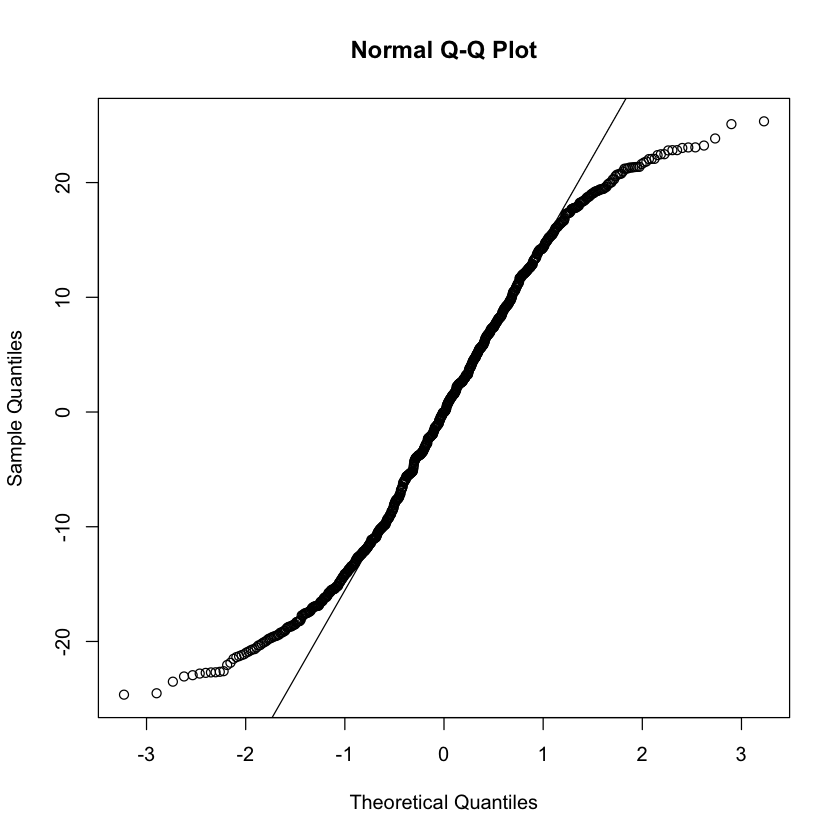

In [13]:
#create Q-Q plot for residuals
qqnorm(summary(temp.mod)$resid)

#add a straight diagonal line to the plot
qqline(summary(temp.mod)$resid)

While the summary of the model shows a reasonably good accuracy in terms of its R-squared value, the residuals of the model expose its inadequacy. The residuals are not normalised as shown in the QQ plot. A number of transformations, preprocessing techniques and feature selection strategies must be implemented to find the best model. We will implement a number of these techniques later on to improve the performance of the model.

Now that we have a better understanding of the type of attributes that are present in the data and how they affect the target variable, let us do some customised exploration of these attributes based on their datatype and overall contribution to the dataset.

### 2.2 Attribute Based Preprocessing (Training)

In this step, we will preprocess the training and testing data separately. Let us start with the training data.

#### 2.2.1 Box Plots and Outliers (Training Data)

We can plot the non-categorical numeric variables into a box plot to understand the distribution of the data in each attribute. The idea is to check whether there are any outliers or unusual anomalies in these columns.

Since the dataset is relatively small, we can ignore the categorical variables from this analysis. As observed in the preliminary analysis above, the categorical columns do not have any dirty data in them.

No id variables; using all as measure variables



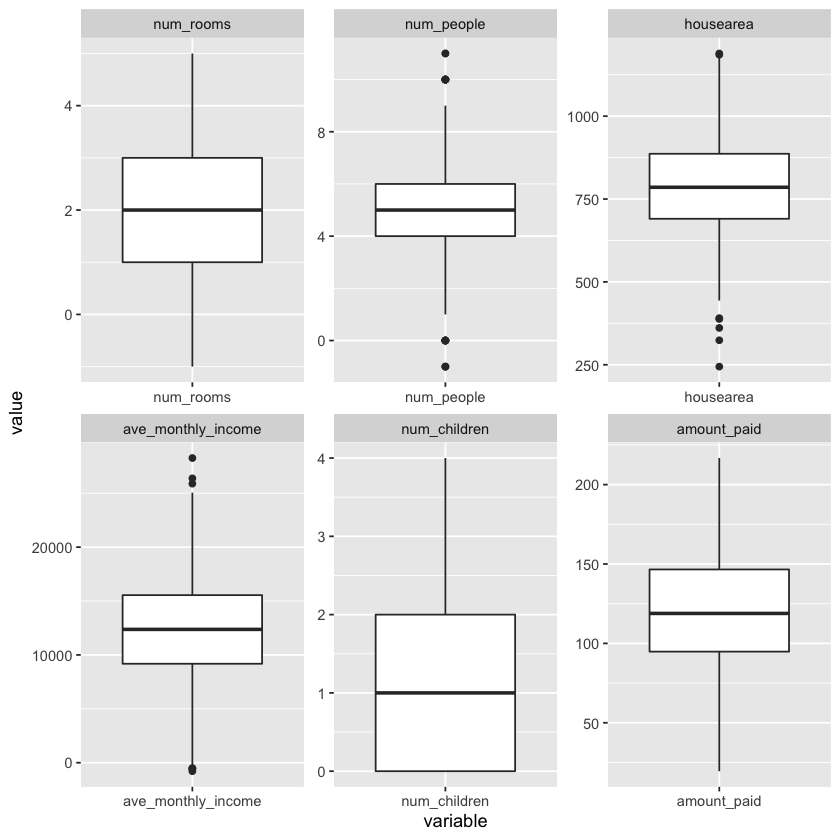

In [14]:
# Elongating the data frame for visualisation
train.melted <- melt(as.data.frame(train[,c(-4, -5, -6, -9, -10)]))

# Generate box plots of all variables except the categorical/nomimal ones
ggplot(train.melted, aes(x = variable, y = value)) +
        facet_wrap(~variable, scales="free") +
        geom_boxplot() +
        scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

We can see that some of the variables have outliers. The variables which have outliers in the training dataset are as follows:

* `num_people`
* `housearea`
* `ave_monthly_income`

Before we begin to handle these outliers, let us define a function to remove them if required. Note that just because we can remove them does not necessarily mean that we should. We need to look at each of these columns individually to decide what to do with these outliers. Additionally, let us also observe `num_children` and `num_rooms` too even though they do not contain outliers. They may contain some anomalous or dirty data.

Before beginning the outlier analysis and removal, it is important to understand that we have the option to perform multivariate outlier removal for `amount_paid` only. Since we don't have a lot of information regarding the plausability of values in each of these columns, if we decide to discard a few rows, it can only be on a univariate basis. 

We can use the `subset()` function in R or Dplyr along with `boxplot.stats()` to create a user defined function for eliminating outliers. The function accepts two arguments: The dataframe and the column containing the outlier rows. It returns the updated version of the data with the outlier rows removed.

In [15]:
# Defining a function to remove the outliers
outlier.rm <- function(original_data, column) {

  new_data <- subset(original_data, subset = !(column %in% boxplot.stats(column)$out))

  return (new_data)
}

Now, we can begin observing these outlier values and deal with them by either handling them, leaving them as it is or by removing them. We need to handle or discard the outlier or problematic values in the train and test data.

#### 2.2.2 `num_people` - Training

First, let us plot a histogram for `num_people`.

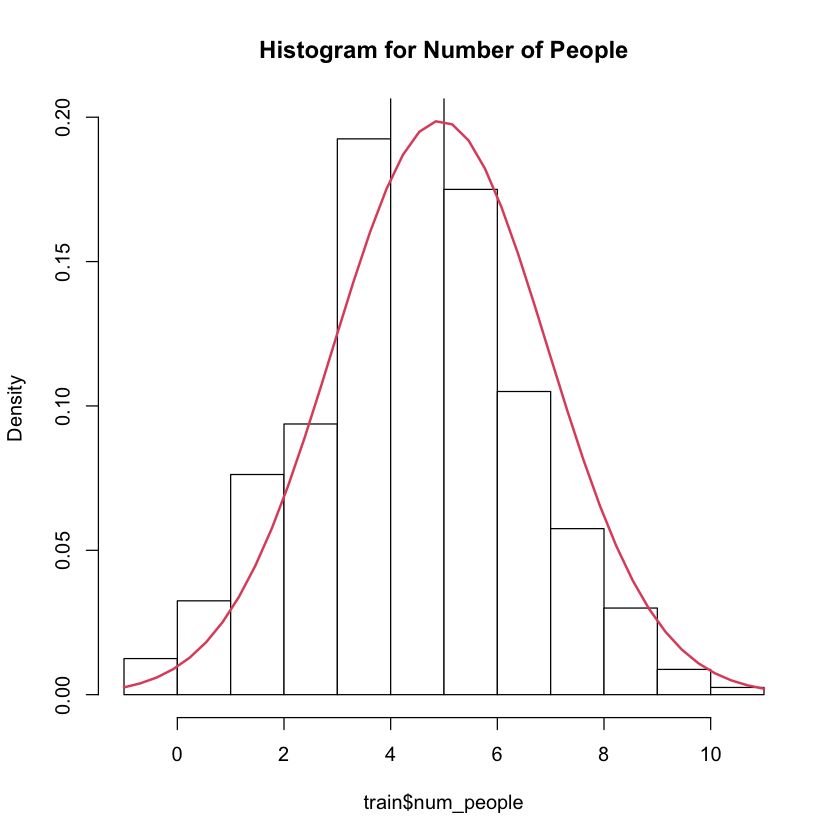

In [16]:
# X-axis
curve.lim <- seq(min(train$num_people), max(train$num_people), length = 40)

# Defining the normal curve
curve <- dnorm(curve.lim, mean = mean(train$num_people), sd = sd(train$num_people))

# Plotting the histogram
hist(train$num_people, prob = TRUE, col = "white",
     ylim = c(0, max(curve)),
     main = "Histogram for Number of People")
lines(curve.lim, curve, col = 2, lwd = 2)

The histogram shows slight skewness in the data. We can use the boxplot.stats to check the outliers in the `num_people` column.

In [17]:
# Checking the outliers in num_people
train[which(train$num_people %in% c(boxplot.stats(train$num_people)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
45,2,0,1042.81,0,0,1,19657.08,0,0,1,47.7800
61,1,0,878.69,0,1,1,7784.73,2,1,1,164.3288
102,3,10,810.50,0,1,1,19652.46,1,1,2,163.0739
126,2,0,549.85,0,0,0,11964.12,2,1,2,122.2516
133,1,11,946.74,0,1,1,14409.51,2,1,2,146.0181
171,4,-1,1058.32,1,0,0,8591.38,4,0,2,119.7876
201,3,0,618.91,1,1,0,9971.60,0,1,3,141.8149
364,3,11,555.62,0,0,1,26382.55,0,1,4,96.2616
365,2,10,1064.73,0,1,1,13669.52,1,0,4,91.1564


Handling the outliers in `num_people` is not a straightforward task. As shown above, we have a large number of outliers in this column. Furthermore, it looks like the `num_people` column also contains negative values. Before we decide what to do with all the outliers, let us attempt to fix the dirty data inside these columns. 

For `num_people`, this column represents the number of people in a household. Logically, it cannot be negative. Finally, we also need to check if there are rows where the number of people is 0 but the data in the other columns of the same row contradicts that logic. Let us look at the rows where `num_people` is negative or 0.

In [18]:
# Data where the num_people column contains negative values
train[train$num_people <= 0,]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
45,2,0,1042.81,0,0,1,19657.08,0,0,1,47.7800
61,1,0,878.69,0,1,1,7784.73,2,1,1,164.3288
126,2,0,549.85,0,0,0,11964.12,2,1,2,122.2516
171,4,-1,1058.32,1,0,0,8591.38,4,0,2,119.7876
201,3,0,618.91,1,1,0,9971.60,0,1,3,141.8149
429,2,0,797.67,1,1,1,9523.97,2,0,5,147.6257
620,3,0,747.69,0,1,1,13125.62,2,1,7,151.6627
638,3,0,724.04,1,1,0,15192.62,1,1,7,160.9778
659,3,-1,673.71,0,1,1,15493.82,0,1,7,102.1382


We can see that there are quite a few rows where the `num_people` column contains negative or zero values. Furthermore, given that the number of rows containing this dirty data is large, we cannot remove these rows entirely. Removing the rows might negatively affect the accuracy of the model. Therefore, we need to attempt to handle these values in the best way possible.

One of the things we can do to fix at least some of these values is to use the `num_children` column. For example, if the number of children is more than 0, then on average, there have to be two parents. One cannot have a household with only children. If we assume the number of parents to be equal to 2, adding 2 to the number of children should give us an acceptable value for the number of people in the household. 

Considering the logic, it is safe for us to make such a fair assumption without bearing the risk of incorrect data. We can use the `mutate()` function from the `dplyr` library and `ifelse` to do this.

In [19]:
# Fixing the dirty values in num_people
train <- mutate(train, num_people = ifelse((num_people <= 0) & (num_children > 0), 2 + num_children, num_people))

# Rechecking the values of num_people
train[train$num_people <= 0,]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
45,2,0,1042.81,0,0,1,19657.08,0,0,1,47.7800
201,3,0,618.91,1,1,0,9971.60,0,1,3,141.8149
659,3,-1,673.71,0,1,1,15493.82,0,1,7,102.1382
769,1,-1,803.67,0,1,1,12543.73,0,1,8,96.9203


Unfortunately, the previous operation was unable to completely fix all the values in the num_people column. Firstly, if the `is_flat` value is 0, it might imply that there is no one living in the property. So, for such rows, the `num_people` value can be 0. We can ignore such instances. To fix these remaining values, we have three alternatives in front of us:

* Remove the rows entirely.
* Update those rows where the number of people is -1 and the `is_flat` property is 1. The assumption this fix takes is that a property may be identified as a flat but it may still not have anyone actively living there. For the rows where we have -1 as the number of people, we can either update them to 0 or 1.
* Update those rows where the number of people is -1 with the mean of the column `num_people` as per the Ed post: https://edstem.org/au/courses/9296/discussion/1025739.

Let us go with the third option. Since we have only two rows with negative values, it will not affect the sanctity of the data.:

In [20]:
# Updating all negative values in num_people to the mean of the column
train <- mutate(train, num_people = ifelse(num_people < 0, round(mean(num_people), 0), num_people))

Let us take a step back and recall the box plot we viewed earlier. It identified a lot of outliers in this column apart from the dirty values. We fixed some of these values. Let us check the rest of the outliers again.

In [21]:
# Checking the outliers in num_people
train[which(train$num_people %in% c(boxplot.stats(train$num_people)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
45,2,0,1042.81,0,0,1,19657.08,0,0,1,47.7800
102,3,10,810.50,0,1,1,19652.46,1,1,2,163.0739
133,1,11,946.74,0,1,1,14409.51,2,1,2,146.0181
201,3,0,618.91,1,1,0,9971.60,0,1,3,141.8149
364,3,11,555.62,0,0,1,26382.55,0,1,4,96.2616
365,2,10,1064.73,0,1,1,13669.52,1,0,4,91.1564
386,2,10,606.20,1,1,1,15788.57,1,0,4,108.0292
689,3,10,875.56,0,0,1,12371.59,1,1,7,136.5344
742,3,10,496.23,0,1,0,7816.52,1,0,8,91.0098


Unlike the previous scenario where we could have made an valid guess based on the number of children, in case of these other dirty and outlier values, it is risky to make guesstimates of the correct values. Therefore, in this case, it would be safer to discard the outlier rows. We can use the user defined function to remove these outliers from the data.

In [22]:
# Removing the outlier for num_people
train <- outlier.rm(train, train$num_people)

# Checking the new row count
cat('The updated row count for the data is:', nrow(train))

The updated row count for the data is: 789

#### 2.2.3 `num_rooms` - Training

Since we have discovered and fixed issues with the `num_people` column, it is likely that such issues exist with other columns as well. Let us observe the values in the `num_rooms` column next even though no outliers were identified for this column.

In [23]:
# Checking the unique values in num_rooms
unique(train$num_rooms)

[1]  3  1  0  4  2  5 -1

It looks like num_rooms also has negative values. Let us repeat the process of checking the values. For the properties that have 0 rooms, they cannot be considered as dirty. Let us look at the values in the `num_rooms` column that are negative.

In [24]:
# Data where the num_rooms column contains negative values
train[train$num_rooms < 0,]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
91,-1,5,697.17,0,1,1,8902.19,2,1,1,163.5030
122,-1,2,638.39,0,1,0,13152.88,2,1,2,135.0967
182,-1,8,801.48,1,1,0,11001.72,2,1,2,192.0626
483,-1,5,806.50,1,1,0,5399.80,0,0,5,90.0506
633,-1,8,696.99,0,1,1,6698.44,0,0,7,64.4764


We have 5 records where the number of rooms is negative. As we can see, this contradicts with the information given in the `num_people` column. Furthermore, if we observe other columns like `num_children` for a few of the observations, their logic does not line up with the negative values in `num_rooms`.

In the case of these dirty rows, we can update them with the mean of the entire column as suggested in the Ed post: https://edstem.org/au/courses/9296/discussion/1025739

In [25]:
# Updating the dirty values in num_rooms with the mean of the entire column.
train <- mutate(train, num_rooms = ifelse(num_rooms < 0, round(mean(num_rooms), 0), num_rooms))

#### 2.2.4 `housearea` - Training

With respect to `housearea`, let us have a closer look at the outliers in this column.

In [26]:
# Checking the outliers in house area
train[which(train$housearea %in% c(boxplot.stats(train$housearea)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
80,2,6,388.17,0,1,1,4868.49,1,1,1,138.1333
137,1,5,323.95,0,1,0,13147.75,1,1,2,101.0887
272,0,4,1185.36,0,1,1,14432.12,0,1,3,132.4279
304,2,6,361.13,0,0,1,14109.32,1,0,4,88.3748
327,2,5,244.40,1,0,1,19911.85,2,1,4,171.7343
624,1,5,390.65,1,1,1,10523.67,3,1,7,196.8078
671,3,5,1189.12,0,1,0,11535.14,0,1,7,94.7641


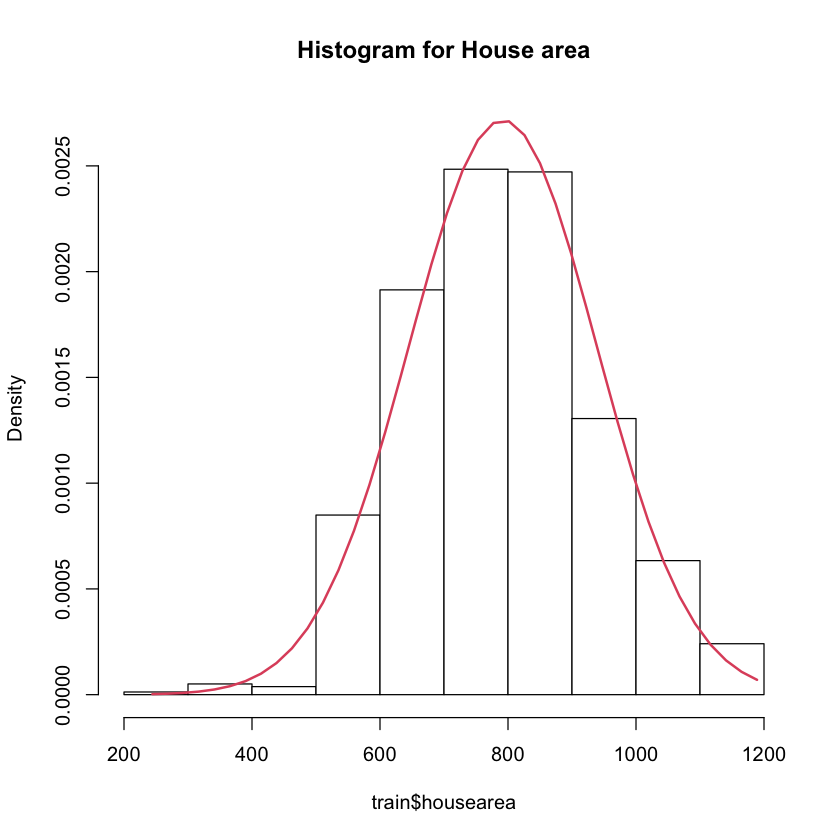

In [27]:
# X-axis
curve.lim <- seq(min(train$housearea), max(train$housearea), length = 40)

# Defining the normal curve
curve <- dnorm(curve.lim, mean = mean(train$housearea), sd = sd(train$housearea))

# Plotting the histogram
hist(train$housearea, prob = TRUE, col = "white",
     ylim = c(0, max(curve)),
     main = "Histogram for House area")
lines(curve.lim, curve, col = 2, lwd = 2)

We have a relatively small number of outlier rows for the `housearea` column. However, the histogram shows visible left skewness in the distribution of data with respect to the `housearea`. Since we cannot determine any remotely logical relationship between `housearea` and the other columns, in this case, we have no choice but to discard these outlier rows from the data. Using the user defined function, we can remove these rows as follows:

In [28]:
# Removing the outlier for amount_paid
train <- outlier.rm(train, train$housearea)

# Checking the new row count
cat('The updated row count for the data is:', nrow(train))

The updated row count for the data is: 782

Before moving onto the next column, let us confirm that there are no negative values in the house area column.

In [29]:
# Checking for negative values in the housearea column
train[train$housearea < 0,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>


#### 2.2.5 `ave_monthly_income` - Training

Let us plot the histogram for the average monthly income column to observe the distribution of values. We can use `boxplot.stats` to view the rows of the outlier values.

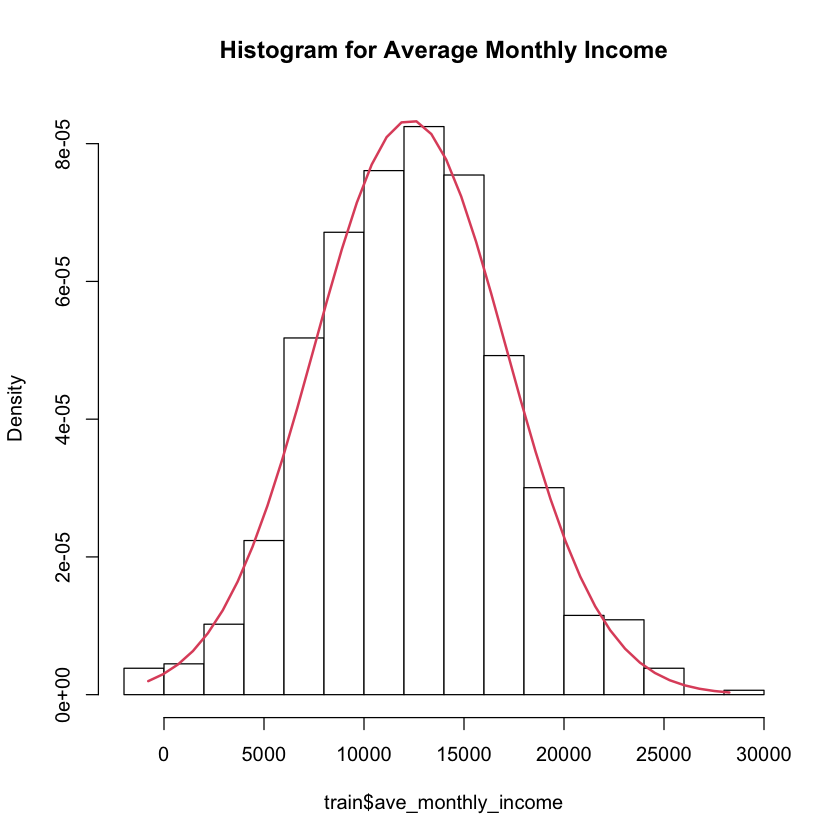

In [30]:
# X-axis
curve.lim <- seq(min(train$ave_monthly_income), max(train$ave_monthly_income), length = 40)

# Defining the normal curve
curve <- dnorm(curve.lim, mean = mean(train$ave_monthly_income), sd = sd(train$ave_monthly_income))

# Plotting the histogram
hist(train$ave_monthly_income, prob = TRUE, col = "white",
     ylim = c(0, max(curve)),
     main = "Histogram for Average Monthly Income")
lines(curve.lim, curve, col = 2, lwd = 2)

In [31]:
# Checking the outliers in average monthly income
train[which(train$ave_monthly_income %in% c(boxplot.stats(train$ave_monthly_income)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
269,0,4,904.53,1,1,1,28265.54,0,0,3,116.6480
391,1,6,889.06,0,1,1,-788.22,1,0,4,61.7679
800,1,4,663.42,1,0,1,25887.33,2,1,8,178.9008


We have a total of 3 rows with outlier values for the ave_monthly_income. Additionally, it looks like there are some negative values here. The average monthly income cannot be negative. As was the case with some of the values in `num_people` and `housearea`, we do not have any additional information that would enable us to perform any kind of multivariate outlier analysis. 

Let us observe the negative values first.

In [32]:
# Checking the rows where the average monthly income value is negative
train[train$ave_monthly_income < 0,]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
184,1,5,670.50,1,0,1,-506.93,2,0,2,105.7306
268,3,7,981.26,0,1,1,-263.27,3,1,3,156.7051
270,2,4,835.05,1,1,1,-45.26,0,1,3,158.9228
310,2,4,828.85,0,1,0,-524.38,2,0,4,76.5258
391,1,6,889.06,0,1,1,-788.22,1,0,4,61.7679
764,3,4,854.50,0,1,1,-588.71,2,1,8,138.9072


We have 6 rows where the ave_monthly_income is a negative value. We can fix this issue in one of two ways.

* We can convert these values into their absolute values and make them positive as these negative values may be the result of a data entry error.
* We can update them with the mean value of the entire column. 

Let us go with the first option. We can check whether this approach creates additional outliers.

In [33]:
# Updating the dirty values in ave_monthly_income
train <- mutate(train, ave_monthly_income = ifelse(ave_monthly_income < 0, abs(ave_monthly_income), 
                                                   ave_monthly_income))

In [34]:
#  Rechecking the outliers in average monthly income
train[which(train$ave_monthly_income %in% c(boxplot.stats(train$ave_monthly_income)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
269,0,4,904.53,1,1,1,28265.54,0,0,3,116.6480
800,1,4,663.42,1,0,1,25887.33,2,1,8,178.9008


Looks like we only have the original two outliers now for the average monthly income. Let us make things straightforward and have them removed.

In [35]:
# Removing the outlier for ave_monthly_income
train <- outlier.rm(train, train$ave_monthly_income)

# Checking the new row count
cat('The updated row count for the data is:', nrow(train))

The updated row count for the data is: 780

With the outliers and dirty data being handled or discarded, let us replot the box plot to understand how the data has been improved.

No id variables; using all as measure variables



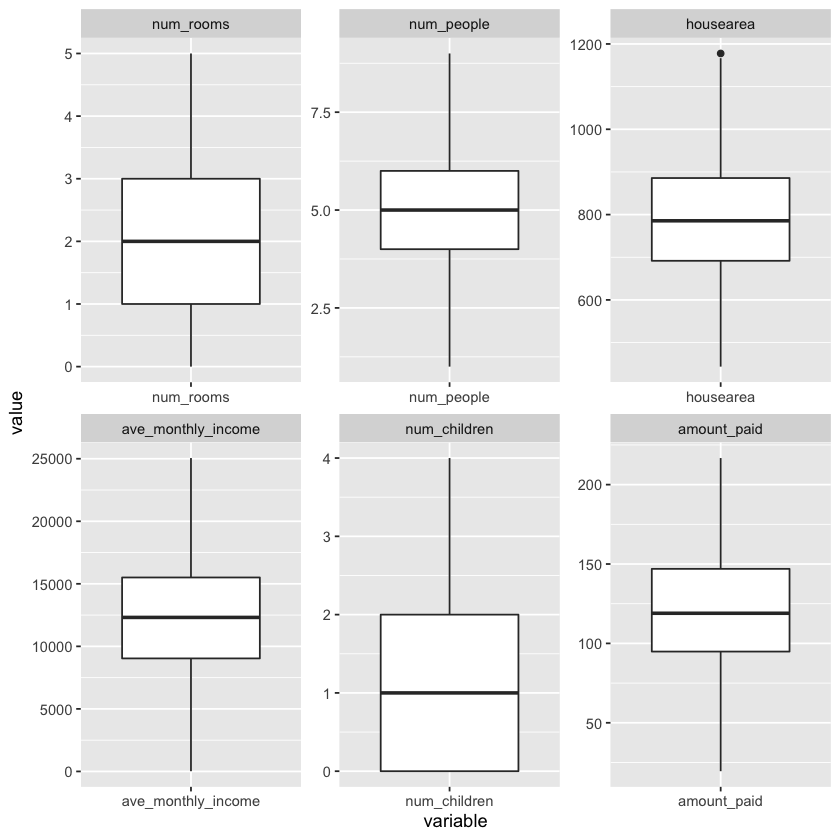

In [36]:
# Elongating the data frame for visualisation
train.melted <- melt(as.data.frame(train[,c(-4, -5, -6, -9, -10)]))

# Generate box plots of all variables except the categorical/nomimal ones
ggplot(train.melted, aes(x = variable, y = value)) +
        facet_wrap(~variable, scales="free") +
        geom_boxplot() +
        scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

### 2.3 Attribute Based Preprocessing (Testing)

With the training data preprocessed sufficiently, let us move onto the testing data. Since we only have around 200 observations here, let us attempt to fix any issues rather than remove all the rows.

#### 2.3.1 Box Plots and Outliers (Testing)

As was the case with the training dataset, we can create a grouped box plot to identify the outliers in the testing data.

No id variables; using all as measure variables



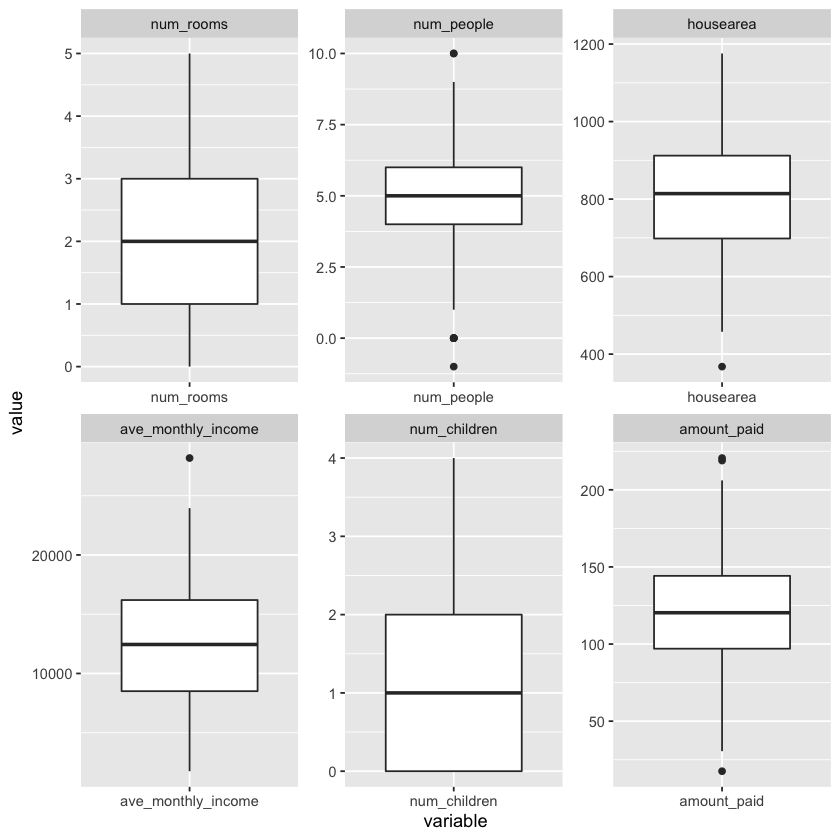

In [37]:
# Elongating the data frame for visualisation
test.melted <- melt(as.data.frame(test[,c(-4, -5, -6, -9, -10)]))

# Generate box plots of all variables except the categorical/nomimal ones
ggplot(test.melted, aes(x = variable, y = value)) +
        facet_wrap(~variable, scales="free") +
        geom_boxplot() +
        scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

The variables which have outliers in the testing dataset are as follows:

* `num_people`
* `housearea`
* `ave_monthly_income`
* `amount_paid`

Let us start with `num_people`

#### 2.3.2 `num_people` - Testing

We can use a histogram and boxplot.stats again to observe the outliers in the testing data.

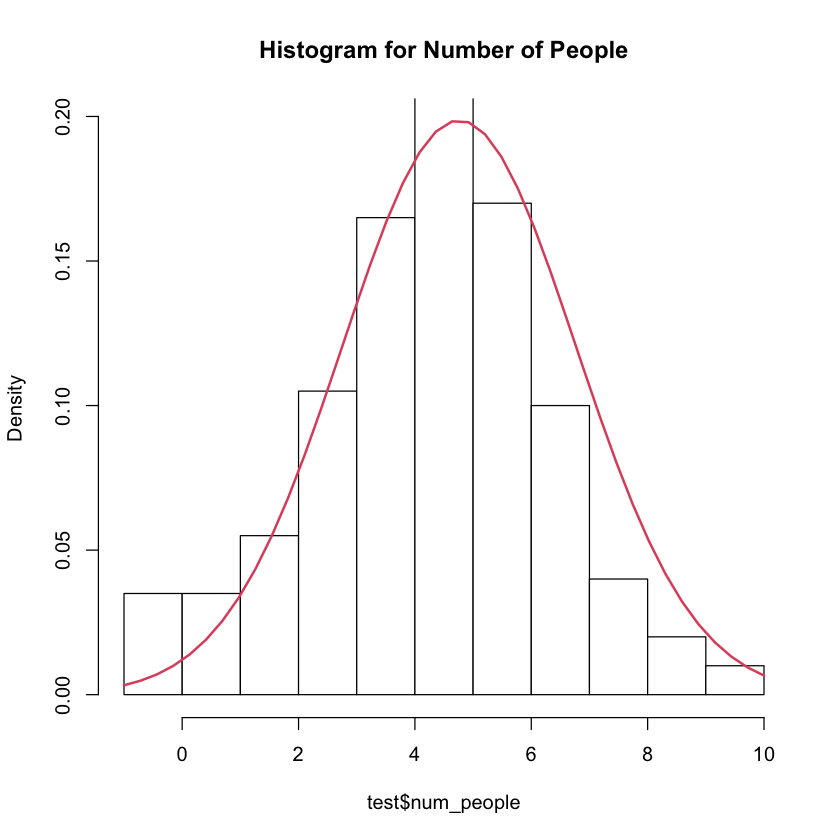

In [38]:
# X-axis
curve.lim <- seq(min(test$num_people), max(test$num_people), length = 40)

# Defining the normal curve
curve <- dnorm(curve.lim, mean = mean(test$num_people), sd = sd(test$num_people))

# Plotting the histogram
hist(test$num_people, prob = TRUE, col = "white",
     ylim = c(0, max(curve)),
     main = "Histogram for Number of People")
lines(curve.lim, curve, col = 2, lwd = 2)

The histogram shows visible skewness in the data similar to the training data. We can use the boxplot.stats again to check the outliers in the `num_people` column.

In [39]:
# Checking the outliers in num_people
test[which(test$num_people %in% c(boxplot.stats(test$num_people)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
804,0,10,659.02,0,0,0,4856.41,0,1,9,81.7521
834,2,-1,594.82,0,1,0,17437.67,1,1,9,111.7397
837,4,0,856.25,1,0,0,12197.03,2,1,9,141.6046
848,3,0,1175.71,1,1,1,20081.92,0,1,9,170.1235
939,0,10,1019.64,0,1,0,3015.99,2,1,10,163.9379
940,2,0,708.78,0,1,1,12111.61,2,1,10,138.6156
946,3,0,772.57,1,1,1,6158.84,0,1,10,163.2648
966,3,0,1060.11,0,1,1,16908.92,1,1,10,131.2337
996,3,0,991.31,0,1,0,6343.63,1,1,10,131.1740


Similar to the training data, we have a number of rows where the number of people is stored as 0 or -1 while the number of children is greater than 0. Using the same technique that was implemented for the training data, we can update them as follows:

In [40]:
# Fixing the dirty values in num_people
test <- mutate(test, num_people = ifelse((num_people <= 0) & (num_children > 0), 2 + num_children, num_people))

# Rechecking the data
test[test$num_people < 0,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>


In [41]:
# Rechecking the outliers of num_people
test[which(test$num_people %in% c(boxplot.stats(test$num_people)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
804,0,10,659.02,0,0,0,4856.41,0,1,9,81.7521
848,3,0,1175.71,1,1,1,20081.92,0,1,9,170.1235
939,0,10,1019.64,0,1,0,3015.99,2,1,10,163.9379
946,3,0,772.57,1,1,1,6158.84,0,1,10,163.2648


In the case of the training data, we had to remove some of the problematic rows for `num_people` where we could not use `num_children` to fix them.

Since we have only 4 outliers here. So, let us remove them from the testing data.

In [42]:
# Removing the outlier for num_people
test <- outlier.rm(test, test$num_people)

# Checking the new row count
cat('The updated row count for the data is:', nrow(test))

The updated row count for the data is: 196

#### 2.3.3. `num_rooms` - Testing

Just like in the training data, the testing data does not have any outliers in the `num_rooms` column. However, they may contain negative values. Let us confirm that.

In [43]:
# Checking the unique values in num_rooms
unique(test$num_rooms)

[1] 2 3 4 1 0 5

Since we don't have any negative values, we can move on to the next column, `housearea`.

#### 2.3.3. `housearea` - Testing

We follow the same drill of using `boxplot.stats()` and a density plot to check the data.

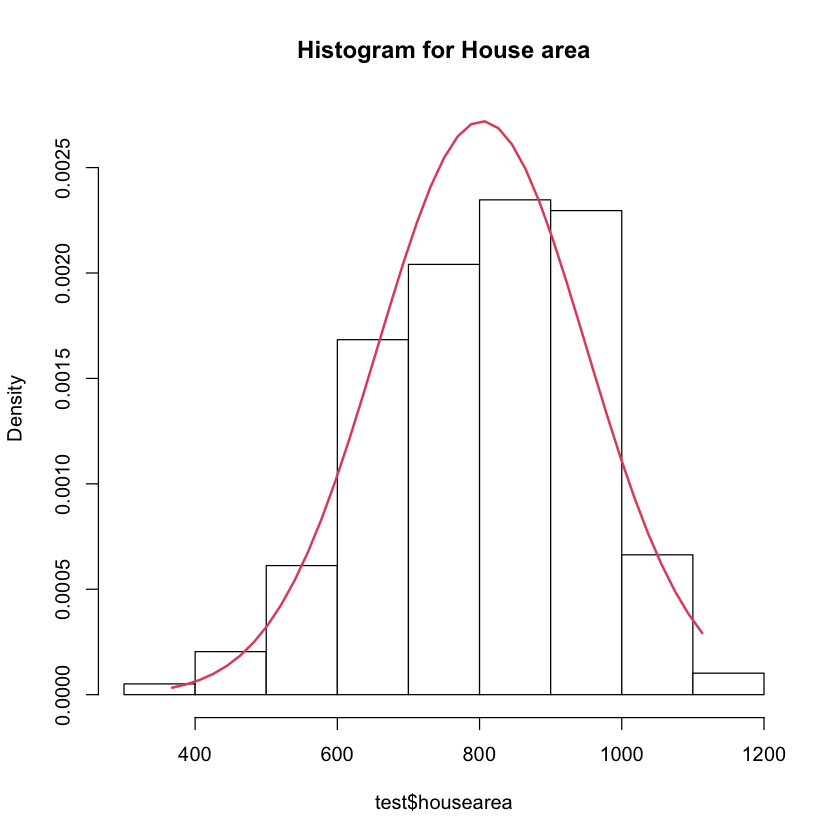

In [44]:
# X-axis
curve.lim <- seq(min(test$housearea), max(test$housearea), length = 40)

# Defining the normal curve
curve <- dnorm(curve.lim, mean = mean(test$housearea), sd = sd(test$housearea))

# Plotting the histogram
hist(test$housearea, prob = TRUE, col = "white",
     ylim = c(0, max(curve)),
     main = "Histogram for House area")
lines(curve.lim, curve, col = 2, lwd = 2)

In [45]:
# Checking the outliers in house area
test[which(test$housearea %in% c(boxplot.stats(test$housearea)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
933,2,5,367.73,0,0,0,7407.48,0,0,10,17.5704


We only have one row where there is an outlier for housearea. Let us remove that in the next step. After removing it, let us confirm that there are no negative values in `housearea`.

In [46]:
# Removing the outlier for housearea
test <- outlier.rm(test, test$housearea)

# Checking the new row count
cat('The updated row count for the data is:', nrow(test))

The updated row count for the data is: 195

In [47]:
# Checking for negative values in housearea
test[test$housearea <=0,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>


#### 2.3.4 `ave_monthly_income` - Testing

For the testing data, we must check for outliers and negative values for this column as follows:

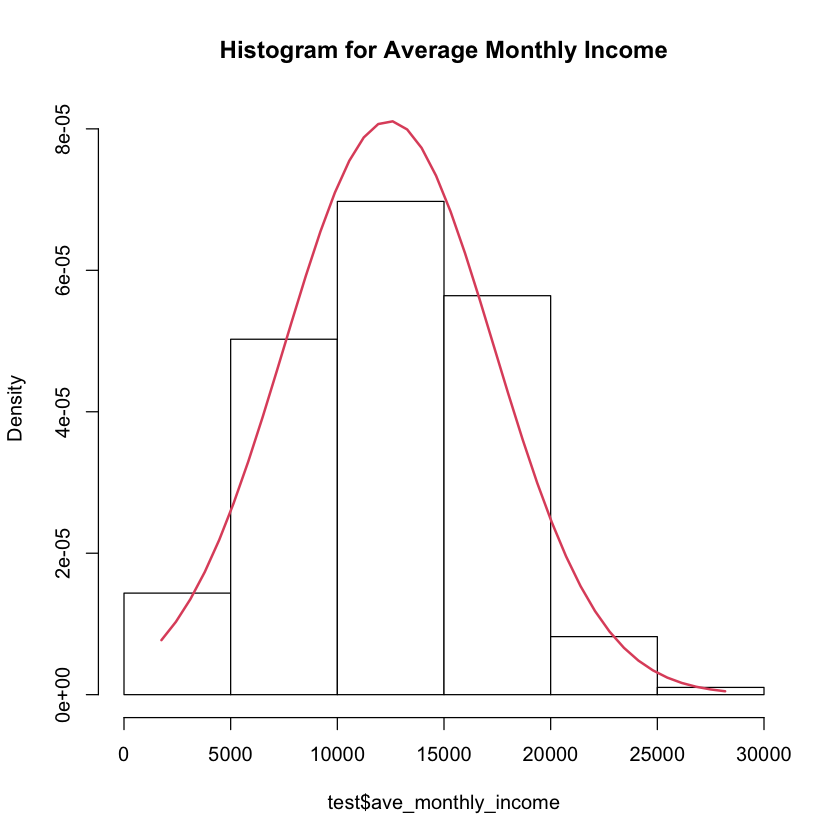

In [48]:
# X-axis
curve.lim <- seq(min(test$ave_monthly_income), max(test$ave_monthly_income), length = 40)

# Defining the normal curve
curve <- dnorm(curve.lim, mean = mean(test$ave_monthly_income), sd = sd(test$ave_monthly_income))

# Plotting the histogram
hist(test$ave_monthly_income, prob = TRUE, col = "white",
     ylim = c(0, max(curve)),
     main = "Histogram for Average Monthly Income")
lines(curve.lim, curve, col = 2, lwd = 2)

In [49]:
# Checking the outliers in average monthly income
test[which(test$ave_monthly_income %in% c(boxplot.stats(test$ave_monthly_income)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
896,1,4,905.65,0,1,0,28177.97,2,0,9,115.3997


In [50]:
# Checking for negative values in ave_monthly_income
test[test$ave_monthly_income < 0,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>


We have one outlier and no negative values in `ave_monthly_income`. Let us remove this outlier in the next step.

In [51]:
# Removing the outlier for ave_monthly_income
test <- outlier.rm(test, test$ave_monthly_income)

# Checking the new row count
cat('The updated row count for the data is:', nrow(test))

The updated row count for the data is: 194

#### 2.3.5 `amount_paid` - Testing

There were no outliers for this column in the training data. However, the boxplot for the test data showed some outliers in `amount_paid`. Let us display those rows here. As with other columns, we can check whether `amount_paid` has any negative values.

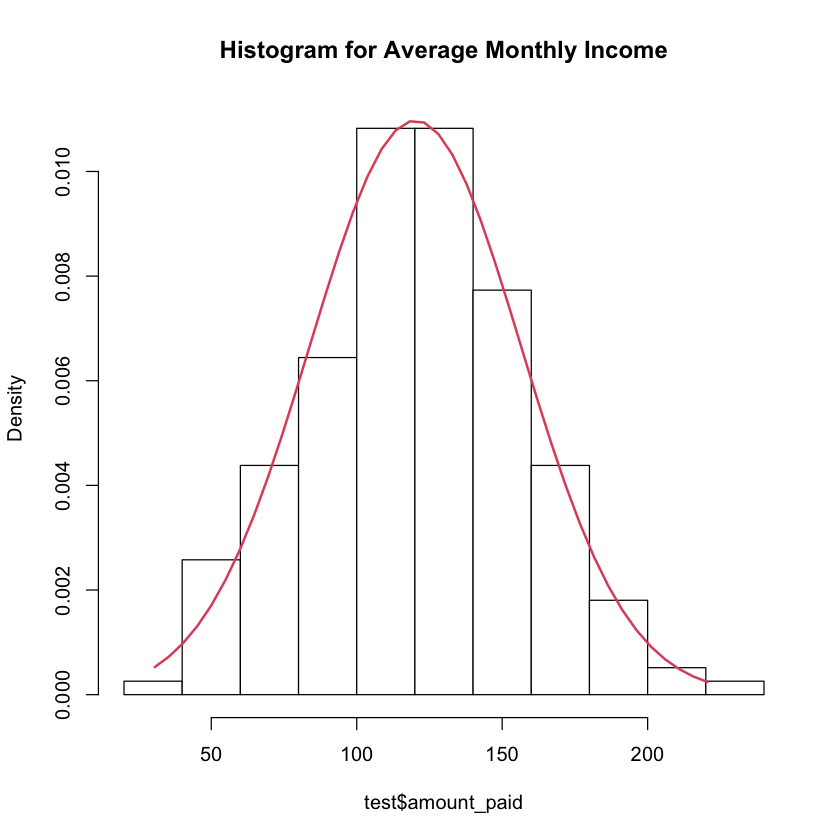

In [52]:
# X-axis
curve.lim <- seq(min(test$amount_paid), max(test$amount_paid), length = 40)

# Defining the normal curve
curve <- dnorm(curve.lim, mean = mean(test$amount_paid), sd = sd(test$amount_paid))

# Plotting the histogram
hist(test$amount_paid, prob = TRUE, col = "white",
     ylim = c(0, max(curve)),
     main = "Histogram for Average Monthly Income")
lines(curve.lim, curve, col = 2, lwd = 2)

In [53]:
# Checking the outliers in amount_paid
test[which(test$amount_paid %in% c(boxplot.stats(test$amount_paid)$out)), ]

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
873,0,5,968.65,1,1,1,23952.19,3,1,9,218.9524
916,3,6,753.75,1,1,1,5864.16,4,1,10,220.5988


In [54]:
# Checking for negative values in amount_paid
test[test$amount_paid < 0,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>


The `amount_paid` column is the dependent attribute of the dataset. Since we have only two outlier values in `amount_paid`, we don't have to overly complicate the outlier computation process or perform multivariate outlier analysis. Given, that we have handled the dirty or anomalous data in the training dataset, it will fit the model well and be able to predict `amount_paid` in the test data sufficiently.

We can leave these rows as they are. Let us replot the boxplots for the test data to view our handywork.

No id variables; using all as measure variables



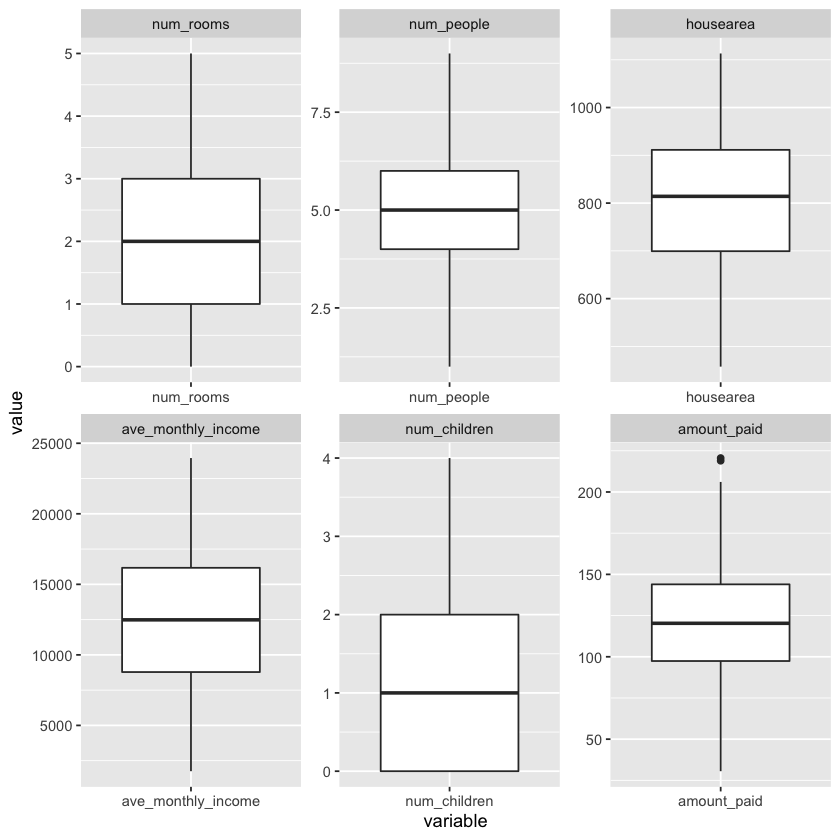

In [55]:
# Elongating the data frame for visualisation
test.melted <- melt(as.data.frame(test[,c(-4, -5, -6, -9, -10)]))

# Generate box plots of all variables except the categorical/nomimal ones
ggplot(test.melted, aes(x = variable, y = value)) +
        facet_wrap(~variable, scales="free") +
        geom_boxplot() +
        scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

As shown in the box plot grid above, we have managed to preprocess the data significantly. With the training and the testing data preprocessed, we can move onto model development now.

## 3. Methodology<a class="anchor" id="sec_4"></a>

We are going to fit two models on the data and compare their performance.

Before we get into the nitty gritty of these two models and feature selection, let us talk about the methodology to be followed in this activity. There are two major operations to be performed here. They are `prediction` and `inference`. The prediction activity involves the following steps:

* **Implementing the each model with all 10 attributes**
* **Observing the results of both models**
* **Infering Feature Importance**
* **Updating the Models based on the most important features**
* **Implementing the models with the top attributes based on feature selection**
* **Final Comparison of Model Performance and Prediction**

## 4. Model Development<a class="anchor" id="sec_5"></a>

We are going to compare the performance two main models:

* Regression models (Multiple linear regression, Lasso regression, forward stepwise regression)
* Random Forests

Both of these models fall under the umbrella of supervised learning. Supervised learning is a branch of machine learning algorithms which predict the given data based on a labeled dataset. 

### 4.1 Using All Predictors

While fitting a model to the data, we need to find the right combination of input variables that are able to predict the data accurately. When we had modeled the raw training data earlier, we observed that it had a relatively high R squared value but its residuals were not normally distributed. This is another indication of the model not fitting well.

Since we are using Multiple Linear Regression first, we can expand upon the linear model selection to select the optimum subset or predictors for the model. We can use this subset as the final model for multiple linear regression. Additionally, we can also use it as the final subset for the random forest model even though it is not required. 

Linear model selection is the process of selecting a model from a set of candidate models.(Chen et al., n.d.). We will also attempt to improve the performance of the model with the help of regularization which works without requiring a selection of attributes.

#### 4.1.1 Hold Out vs. Cross Validation

A good model balances the goodness of fit with overall simplicity. (Chen et al., n.d.). We shall explore data modeling in two ways:

* Hold Out Validation
* Cross Validation

Let us start with the hold out validation method for the linear regression model. We shall talk about this is in a moment.

In [56]:
# Using a basic multiple linear regression model
first.mod <- lm(amount_paid ~., data = train)

# Printing the model summary
summary(first.mod)


Call:
lm(formula = amount_paid ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.3339 -10.6864  -0.0187   9.7209  25.2465 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.555e+01  3.505e+00   7.289 7.77e-13 ***
num_rooms          -2.803e-01  4.439e-01  -0.631   0.5279    
num_people          9.897e-01  2.423e-01   4.085 4.87e-05 ***
housearea           5.588e-03  3.203e-03   1.745   0.0814 .  
is_ac               3.359e+01  9.311e-01  36.077  < 2e-16 ***
is_tv               1.461e+01  1.141e+00  12.805  < 2e-16 ***
is_flat             1.132e+01  8.992e-01  12.592  < 2e-16 ***
ave_monthly_income  3.987e-04  9.566e-05   4.167 3.43e-05 ***
num_children        1.810e+01  4.849e-01  37.335  < 2e-16 ***
is_urban            5.033e+01  9.241e-01  54.460  < 2e-16 ***
month               2.088e-01  1.970e-01   1.060   0.2895    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard 

In the next step, we can use the `tidy()` function from the `broom` library to arrange the coefficients of the model. We have already talked about the coefficients of a model in `section 2.1.2`.

There are two ways in which we can determine the predictor variables that affect `amount_paid` the most: t-value and p-value. As mentioned earlier in `section 2.1.2`, we will use the t.value here to identify the most important predictors as we are dealing with a relatively smaller dataset.

The t-statistic is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. (Wikipedia Contributors, 2018)

In [57]:
# Storing the model summary
fit <- summary(first.mod)

# Tidying the model summary
coefs <- tidy(fit)

# Ordering the coefficients of the model
coefs[order(coefs$statistic, decreasing = TRUE),]

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
is_urban,50.3279248655,0.9241281950,54.459895,4.046193e-266
num_children,18.1017726061,0.4848524550,37.334600,7.468410e-175
is_ac,33.5914109607,0.9310976055,36.077218,1.451348e-167
is_tv,14.6058526087,1.1406485646,12.804867,3.625023e-34
is_flat,11.3222661945,0.8991984682,12.591510,3.450713e-33
(Intercept),25.5493099657,3.5052204733,7.288931,7.766002e-13
ave_monthly_income,0.0003986578,0.0000956603,4.167432,3.430297e-05
num_people,0.9896888819,0.2422697228,4.085070,4.868605e-05
housearea,0.0055880318,0.0032025052,1.744894,8.140280e-02


As per the above ordering, `is_urban` has the strongest relationship with `amount_paid`, similar to the earlier case in `section 2.1.2`. The above output shows us the 10 predictors in decreasing order of their relevance to `amount_paid`. Based on their t-statistic, it looks like some of the values are highly significant with respect to `amount_paid` while others have a very low significance. In any case, we need to perform some additional model selection to answer the following questions:

* What is the subset of predictors that can fit the training data better?
* Is there a non-linear combination of predictors which can predict the data better than the predictors on their own?

Let us compute some performance metrics to help us answer these questions and improve the overall performance of the model.

First, let us plot the results of the model in a 4 plot grid to display the residuals of the model in different ways. 

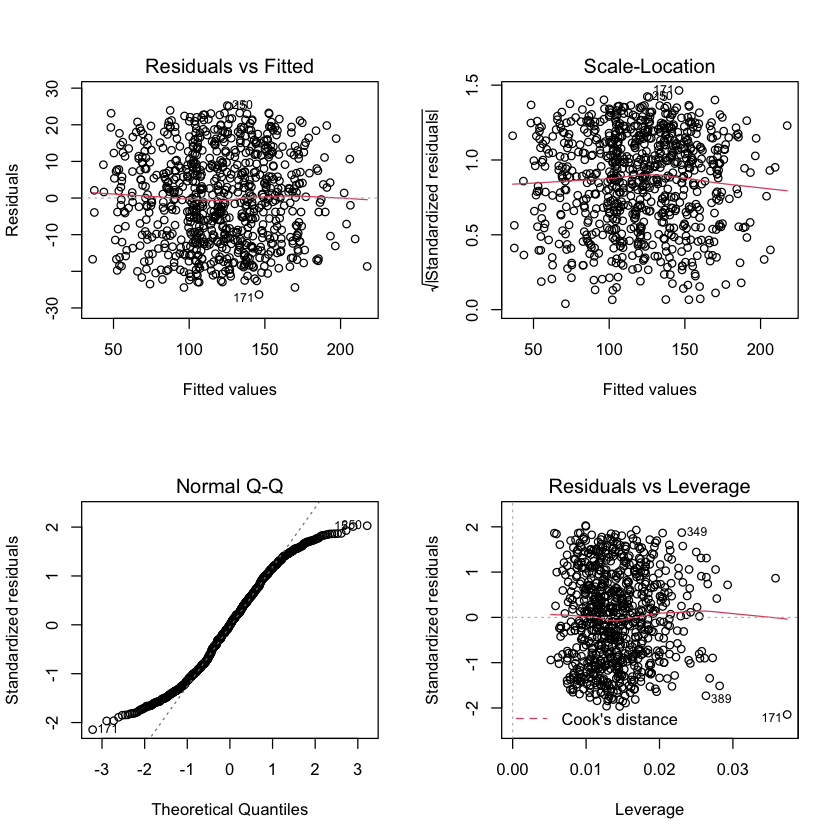

In [58]:
# Setting the plot grid
par(mfcol=c(2,2))

# Plotting the lm model
plot(first.mod)

We have 4 different plots above:

* **Residuals vs. Fitted**: This plot is used to check whether there is any non-linearity between the target variable `amount_paid` and the predictors. Usually, if the residuals are spread evenly across the red line, it would suggest a linear relationship. However, as we can see in the above plot, the residuals are scattered unevenly across the line. This suggests the possibility of a non linear relationship between the 10 variables and `amount_paid`. We shall explore this further. For now, let us look at the other plots.

* **Normal Q-Q**: This plot is designed to show whether the residuals of the model are normally distributed or they deviate. The above Q-Q plot shows us that there is significant deviation of the residuals from the normal.

* **Scale-Location**: This is another measure of the spread of the residuals with respect to the 10 predictor variables. The plot shows us that there is a slight uneveness in the spread of the residuals across the 10 predictors. We can use this information to imply that there is most likely a better combination of variables where the residuals will be more evenly spread across the line.

* **Residual-Leverage**: This plot helps us to identify the most influential data samples with the help of Cook's distance. Observations which have more outliers will affect the accuracy of our linear model. Because we handled the problamatic outliers in the preprocessing stage, this plot shows the data points reasonably within Cook's distance. There is still some room for improvement. We shall explore that when we plot the results of the non-linear model.

If the above plot for Cook's distance is not entirely clear, let us plot it another way.

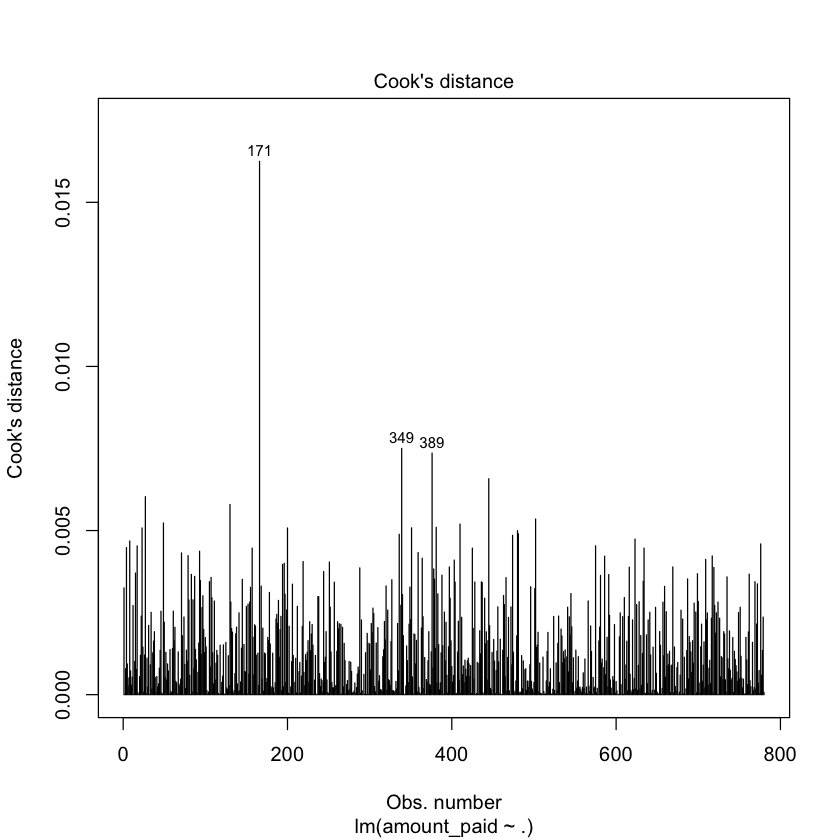

In [59]:
# Plotting Cook's Distance
plot(first.mod, which = 4)

Before we start building our final models, let us create a dataframe to store the RMSE generated by these models.

In [60]:
# Creating a dataframe to record the RMSE for each model
mod_perf <- data.frame('Model' = c("Multiple Linear Regression", 
                                   "Lasso Regression", "Random Forest", "Best Subset", "Non-Linear"), 'rmse' = 0)

**k-fold Cross Validation**: When we implemented a basic linear regression model with `lm()`, we implemented it with a technique called the Hold-Out Validation Method. In this method, we train the model on the entire training dataset and fit it to new data. This time, we are going to use the `train()` function from the caret library to train the model.

k-Fold Cross Validation is a validation method in which the training dataset is divided into k equal sized subsets called folds. As it performs k iterations, in each iteration, the kth subset of the data acts as the validation dataset while the model is trained on the other subsets. In each iteration, the model score is captured and the mean of the model scores is computed at the end. 

The key aspect of this technique is the selection of the value k. The value of k must be chosen such that each sample is large enough to statistically represent the entire training dataset. Since we have a relatively small dataset, we can assign k as 10 going ahead. 

The `trainControl()` method is used to set the number of folds for the cross validation process. Before we proceed with cross validation for all the models, let us try to find the optimum number of folds for it. The below code block iterates through fold values from 5 to 15. In each iteration, the cross validation will be done on the model for the current number of folds and the error will be recorded. Since we have a relatively small dataset, the number of folds must not be too big. The goal is to have enough data for the validation dataset.

In [61]:
# Creating a dataframe to capture the different fold errors
fold.error <- data.frame('folds' = 5:15, 'rmse' = 0)

In [62]:
# Counter for the current row of the dataframe
j = 0

for (i in 5:15) {
    
    # Defining a random number generator to control the randomness of the splitting
    set.seed(1)

    # Defining the model validation method with the number of folds.
    c <- trainControl(method = "cv", number = i)
    
    # Incrementing the counter by 1
    j = j + 1

    # Training the model
    t <- train(amount_paid ~ .,
                     data = train,
                     trControl = c,
                     method = "lm")
    
    # Storing the fold error in the dataframe
    fold.error[j, 'rmse'] = round(t$results[1, 2], 4)


}

In [63]:
# Displaying the fold error 
fold.error

folds,rmse
<int>,<dbl>
5,12.6701
6,12.6125
7,12.7197
8,12.6160
9,12.5683
10,12.5589
11,12.5967
12,12.5638
13,12.6009


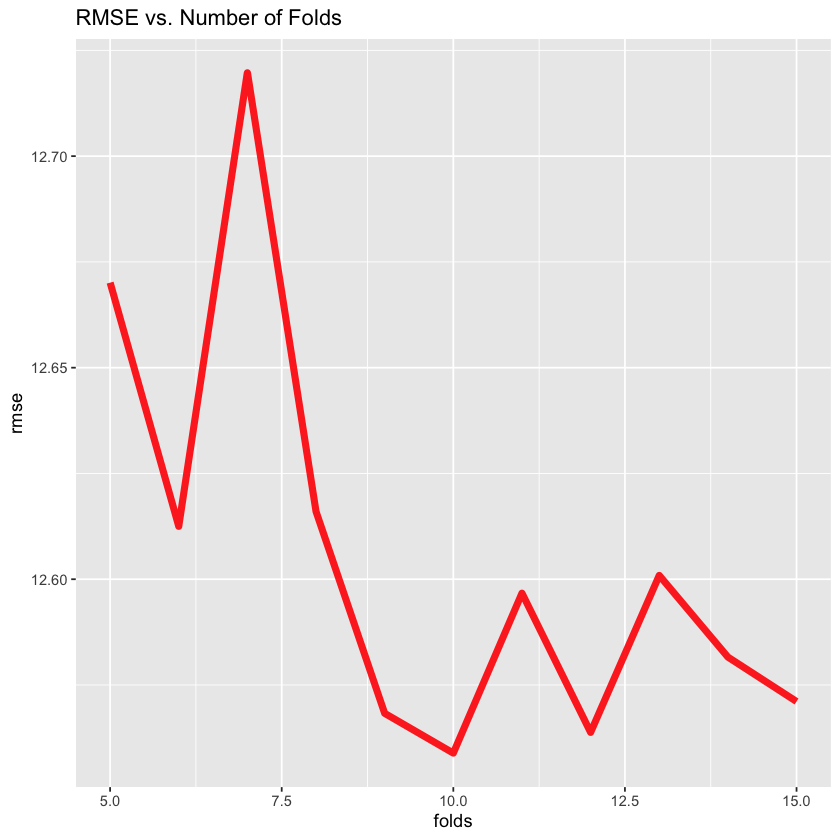

In [64]:
# Plotting the number of folds vs RMSE
ggplot(fold.error, aes(x = folds, y = rmse)) +
  geom_line(color="Red", size=2, alpha=0.9, linetype = 1) +
  ggtitle("RMSE vs. Number of Folds")

As shown in the above graph, the lowest error is experienced when the number of folds is 10. We shall proceed with this number while modeling the multiple linear regression model and the random forests model.

In [65]:
# Defining a random number generator to control the randomness of the splitting
set.seed(1)

# Defining the model validation method with the number of folds.
cv <- trainControl(method = "cv", number = 10)

# Training the model
lm2 <- train(amount_paid ~ .,
                     data = train,
                     trControl = cv,
                     method = "lm")

# Printing model summary
summary(lm2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.3339 -10.6864  -0.0187   9.7209  25.2465 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.555e+01  3.505e+00   7.289 7.77e-13 ***
num_rooms          -2.803e-01  4.439e-01  -0.631   0.5279    
num_people          9.897e-01  2.423e-01   4.085 4.87e-05 ***
housearea           5.588e-03  3.203e-03   1.745   0.0814 .  
is_ac               3.359e+01  9.311e-01  36.077  < 2e-16 ***
is_tv               1.461e+01  1.141e+00  12.805  < 2e-16 ***
is_flat             1.132e+01  8.992e-01  12.592  < 2e-16 ***
ave_monthly_income  3.987e-04  9.566e-05   4.167 3.43e-05 ***
num_children        1.810e+01  4.849e-01  37.335  < 2e-16 ***
is_urban            5.033e+01  9.241e-01  54.460  < 2e-16 ***
month               2.088e-01  1.970e-01   1.060   0.2895    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error

In [66]:
# Printing the performance of the cross validation model
print(lm2)

Linear Regression 

780 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 703, 704, 701, 703, 701, 701, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  12.5589  0.8790981  10.69158

Tuning parameter 'intercept' was held constant at a value of TRUE


In [67]:
# Recording the RMSE
mod_perf[1, 'rmse'] = round(lm2$results[1, 2], 4)

If we observe the model summary, notice that we are getting a slightly lower R-squared value than the raw data. Additionally, we are getting an RMSE of 12.55 from the cross validation process. Having said that, is there scope for improving the same model? Is there a better combination of predictors which can fit the training data better? 

In [68]:
# Tidying the model summary
coefs <- tidy(summary(lm2))

# Ordering the coefficients of the model
coefs[order(coefs$statistic, decreasing = TRUE),]

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
is_urban,50.3279248655,0.9241281950,54.459895,4.046193e-266
num_children,18.1017726061,0.4848524550,37.334600,7.468410e-175
is_ac,33.5914109607,0.9310976055,36.077218,1.451348e-167
is_tv,14.6058526087,1.1406485646,12.804867,3.625023e-34
is_flat,11.3222661945,0.8991984682,12.591510,3.450713e-33
(Intercept),25.5493099657,3.5052204733,7.288931,7.766002e-13
ave_monthly_income,0.0003986578,0.0000956603,4.167432,3.430297e-05
num_people,0.9896888819,0.2422697228,4.085070,4.868605e-05
housearea,0.0055880318,0.0032025052,1.744894,8.140280e-02


If we observe the ordered coefficients of the model, it looks like the cross validation method also came to the same conclusion about the most significant and the least significant variables. This is our first model. Now, let us build upon this model.

#### 4.1.2 Lasso Regression with Cross Validation

It is usually not ideal to use all predictors for modeling the data. This is because of a phenomenon called overfitting. Overfitting occurs when the model fits the data too well such that it is unable to generalise better to data that is different from the training data. In other words, it has captured information that is unique only to the training data. This extra information can be considered as noise. A highly overfitted model will perform well on the training data but produce a large error when applied to the testing data.

Therefore, subset selection is an important aspect of reducing the overfitting of a model and improving the overall performance of the model.

The method we will use first is called Regularization. Regularization is a technique that battles overfitting in a model. It does this by introducing a penalty term in the error function. This penalty term prevents the model coefficients from attaining extreme values. The error function is called the residual sum of square errors of the model.

We are trying out regularization first because it involves maintaining the number of predictor variables as they are and tuning the weights of these variables instead. The model will automatically eliminate the less important variables as it penalizes their weights.

There are two types of regularization:

* L1 Norm, also known as Lasso Regression
* L2 Norm, also known as Ridge Regression

We are going to use Lasso regression here for model selection. Ridge regression is not appropriate here as the values in this model can be shrunk close to 0 but not exactly 0. Secondly, the linear model we have implemented earlier shows us that only a few predictor variables may induce a significant change in `amount_paid`. Lasso regression is most suited to such a scenario where there are a small number of significant parameters while the others are more closer to 0 in their significance. Ridge regression works best when we have a dataset where most or all of the predictor variables have significant weightage with respect to the target variable.

**Lasso Regression**: In this form of regularization, the coefficients of the model are shrunk to a mean of 0 by introducing a penalizing factor called $\alpha$. When $\alpha$ is set to 0, a larger value will penalize the optimisation function. With the addition of the penalty term, the loss function takes the form:

$$
L_{l a s s o}(\hat{\beta})=\sum_{i=1}^n\left(y_i-x_i^{\prime} \hat{\beta}\right)^2+\lambda \sum_{j=1}^m\left|\hat{\beta}_j\right| .
$$

Since the coefficients are shrunk in such a manner, less important input variables will be eliminated effectively. (Lasso and Ridge Regression Tutorial, n.d.)

To perform Lasso regression, we are going to use the `glmnet` library in R. From this library, we can use a function called `model.matrix()`. This function will create a matrix of the 10 predictor variables and convert catrgorical variables into dummy variables, although that is not required here.

We need to use this function for the training data.

In [69]:
# Defining a model matrix from the dataframe
train.matrix <- model.matrix(amount_paid ~ ., data = train)[,-1]

Next, we can define a sequence of potential values for lambda.

In [70]:
# Defining a sequence of values for lambda
lambda.seq <- 10^seq(4, -2, length = 100)

We do two things here. We fit a lasso model to the matrix converted input variables with glmnet() function. In this function, we must pass the above sequence of lambda values. Next, we can use the `cv.glmnet()` function to find the best value for $\lambda$. This step performs a similar operation to the k-fold cross validation performed by the `caret` library. The only difference is that we are trying to find the best value for lambda here in an iterative manner.

In [71]:
# Controlling the randomness of the split
set.seed(1)

# Performaing cross validation to find the best value for lambda
cv.lasso <- cv.glmnet(train.matrix, train$amount_paid, alpha = 1, lambda = lambda.seq, thresh = 1e-12)

# Stroing the best value for lambda
opt.lasso <- cv.lasso$lambda.min
opt.lasso

[1] 0.05336699

Let us try to visualise what just happened in the above step. The below plot shows us the mean squared error for different values of $\lambda$. It increases sharply a little above log $\lambda$=0.

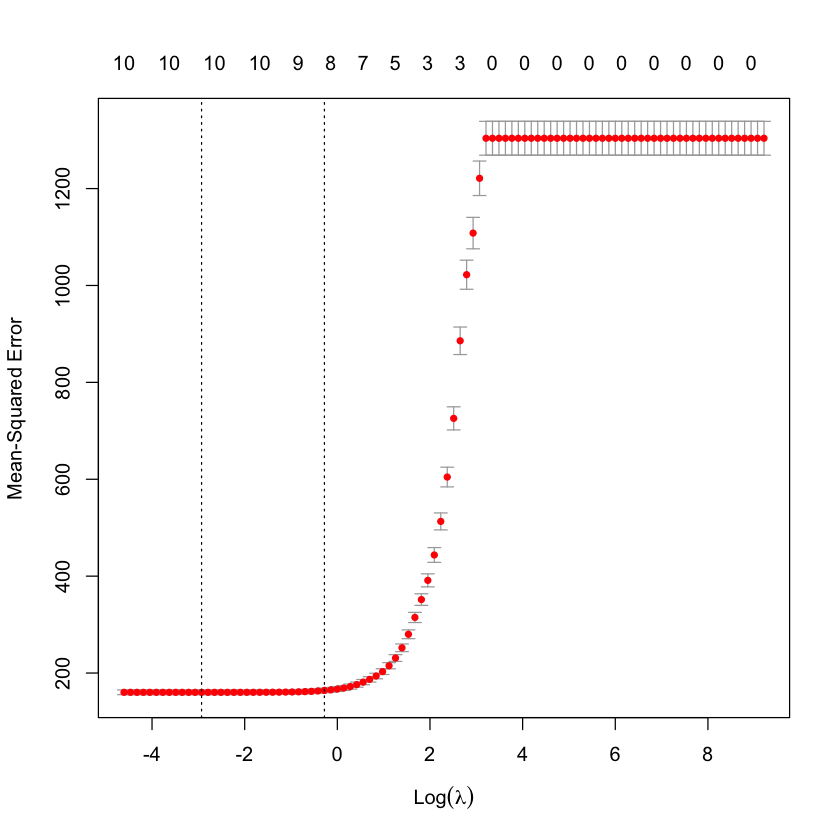

In [72]:
# Plotting the results of cross validation
plot(cv.lasso)

Now let us observe the exact value for the mean squared error for the optimum value of lambda. We can do this by simply printing the results of the cross validation process.

In [73]:
# Printing the results of cross validation
cv.lasso


Call:  cv.glmnet(x = train.matrix, y = train$amount_paid, lambda = lambda.seq,      alpha = 1, thresh = 1e-12) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min 0.0534    88   160.2 4.816      10
1se 0.7565    69   164.1 4.775       8

Now, let us observe the root mean squared error for the best $\lambda$.

In [74]:
# Computing the RMSE 
lasso_rmse <- sqrt(round(min(tidy(cv.lasso)$estimate), 1))

# Printing the RMSE
cat('The root mean squared error is:', lasso_rmse)

The root mean squared error is: 12.65701

In [75]:
# Recording the RMSE
mod_perf[2, 'rmse'] = lasso_rmse

If we compare the root mean squared error from the lasso regression with that of the multiple linear regression model, there is not a significant improvement or decline. Simply based on the numerical comparison of both errors, we can go with the multiple linear regression model.

Our second performance metric is to observe the most signifcant variables with respect to `amount_paid`. Let us observe them through the lens of lasso regression. We can use the apply function to view and sort the most significant variables for the best value of $\lambda$. 

In [76]:
# Ordering the coefficients of the model in descending order of significance
apply(coef(cv.lasso, "lambda.min"), 2, sort, decreasing = TRUE)

,s1
is_urban,50.2122985284
is_ac,33.4661783225
(Intercept),26.4061710821
num_children,18.0448842343
is_tv,14.4827064487
is_flat,11.2036848321
num_people,0.9623766252
month,0.1830785966
housearea,0.0053049857
ave_monthly_income,0.0003867324


There is a slight discrepancy of what accounts as a significant variable for the lasso regression model. However, the set of highly significant variables remains the same as compared with the linear regression model. We will verify this with the subset selection process and non-linear polynomials.

#### 4.1.3 Random Forests Model with Cross Validation

Before talking about random forest, let us briefly touch upon the decision tree algorithm. A **decision tree** algorithm is a model that builds a tree like structure where it breaks a dataset into smaller subsets. At each split in the decision tree, we have a node. A node has one or more branches. The topmost node is called the root node. This node corresponds to the most significant input variable. The nodes which don't have any additional nodes under them are called the leaf nodes. The splitting of the tree into branches continues till the leaf node is reached. The decision node determines the nature of a split. 

The outcome of a decision tree is based on information gain and entropy. Information gain outlines the reduction in uncertainity in the target variable, given the input variables. A high information gain implies low uncertainity.

Random forest is a machine learning technique that is used for regression models with continous data and classification models with discrete labels. As the name suggests, a single random forest algorithm consists of multiple decision trees. The outcome of a random forest algorithm is computed from the ranking of the decisions from all trees. The more number of trees, the better is the outcome. 

The random forest regression is similar to linear regression except in terms of their error function. It essentially improves the performance from a single decision tree by increasing precision and avoiding overfitting.

Coming to execution, we can specify the cross validation parameters with the `trainControl()` method in `caret` and `train()` to train the model.

In [77]:
## Setting the seed for reproducibility
set.seed(1)

## Defining repeated cross validation with 10 folds and 5 repeats
cv <- trainControl(method='cv', number = 10)

## Training a random forest model
forest <- train(

        # Using all input variables
        amount_paid~.,

        # Specifying the training data
        data = train,

        # `Specifying the method as random forest
        method='rf',

        # Adding the repeated cross validation
        trControl = cv,

        # Accuracy to measure the performance of the model
        metric='RMSE')

## Displaying the performance of the model
forest

Random Forest 

780 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 703, 704, 701, 703, 701, 701, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   2    16.07391  0.8504666  13.34790
   6    14.12254  0.8472268  11.78270
  10    14.42508  0.8403171  11.96572

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 6.

In [78]:
# Recording the RMSE
mod_perf[3, 'rmse'] = round(forest$results[2, 2], 4)

If we were to compare the RMSE and Rsquared value of the model, it has performed poorly in comparison to the multiple linear regression model. For now, the latter is the clear winner.

Before we move on to stepwise regression, let us view the statistically significant variables selected by the random forest model with respect to `amount_paid`.

In [79]:
# Predictors in decreasing order of significance
varImp(forest, scale = FALSE)

rf variable importance

                   Overall
is_urban            434570
num_children        203343
is_ac               183397
ave_monthly_income   39975
housearea            38896
is_tv                23770
num_people           22250
is_flat              21629
month                19828
num_rooms            11892

We can see slight differences in the variables that have been deemed more important than others as compared to the results of the linear regression model. For example, `housearea` is ranked higher while `is_flat` and `is_tv` are ranked lower. This is the reason why the model has not performed as well as the linear regression model. It is not able to correctly identify the most important attributes.

Based on this information, we can conclude that assuming a linear relationship between the predictors and `amount_paid`, we can choose Multiple Linear regression as the better model. 

In the next two sections, we are going to implement two important pillars of model selection:

* Stepwise regression
* Non-linear polynomial regression

### 4.2  Stepwise Regression

Let us now use Step-wise regression to find the best subset of the data. Stepwise regression is an iterative process of selecting a set of independent variables. The goal of step-wise regression is to select the optinum subset of predictor variables in terms of model performance. There are three types of stepwise regression techniques:

* **Backward Stepwise selection**: In backward stepwise selection, we start with a full least squares model that uses all predictors. It iteratively removes the least useful predictor one at a time.

* **Forward Stepwise selection**: In forward stepwise selection, we start with a model having no predictors with each predictor added iteratively to the model. At each step of the iteration, the predictor that improves the model the most out of the remaining predictos is added to the model.

* **Combined Stepwise selection**: In this stepwise selection, the forward and backward stepwise selection is implemented simultaneously. Let us perform each type of selection process and check if the results match up. For all three stepwise regression processes, we can use the `regsubsets()` library from the `leaps` package to do this.

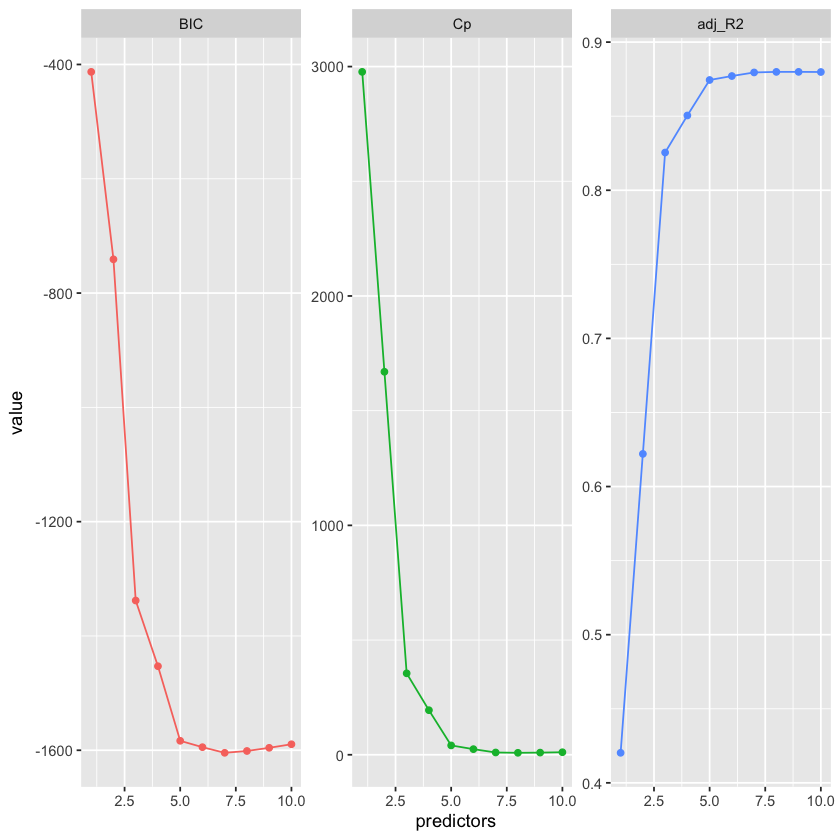

In [80]:
# Performing forward stepwise selection
forward <- regsubsets(amount_paid ~ ., train, nvmax = 19, method = 'forward')
results_for <- summary(forward)

# Extracting and plotting the results of the selection process
tibble(predictors = 1:10,
       adj_R2 = results_for$adjr2,
       Cp = results_for$cp,
       BIC = results_for$bic) %>%
        gather(statistic, value, -predictors) %>%
        ggplot(aes(predictors, value, color = statistic)) +
        geom_line(show.legend = F) +
        geom_point(show.legend = F) +
        facet_wrap(~ statistic, scales = "free")

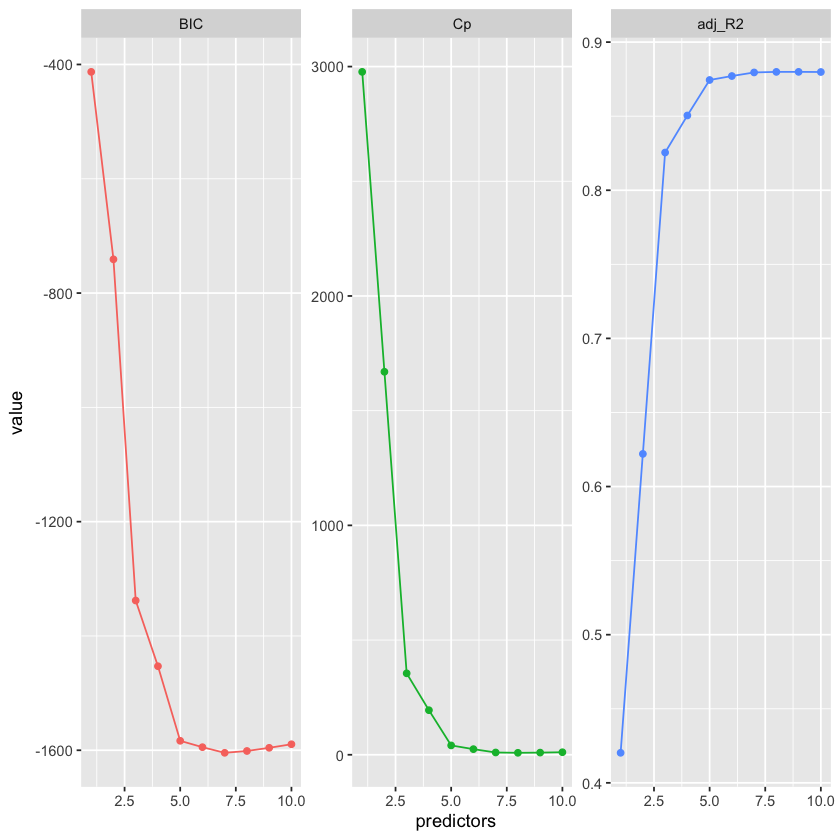

In [81]:
# Performing backward stepwise selection
backward <- regsubsets(amount_paid ~ ., train, nvmax = 19, method = 'backward')
results_back <- summary(backward)

# Extracting and plotting the results of the selection process
tibble(predictors = 1:10,
       adj_R2 = results_back$adjr2,
       Cp = results_back$cp,
       BIC = results_back$bic) %>%
        gather(statistic, value, -predictors) %>%
        ggplot(aes(predictors, value, color = statistic)) +
        geom_line(show.legend = F) +
        geom_point(show.legend = F) +
        facet_wrap(~ statistic, scales = "free")

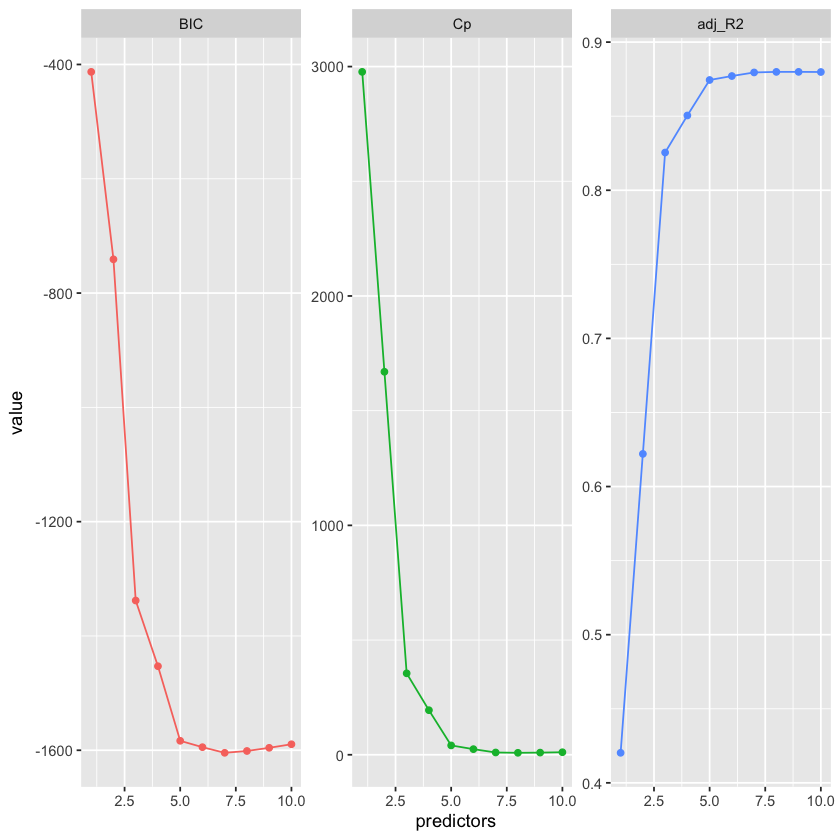

In [82]:
# Performing combined stepwise selection
combined <- regsubsets(amount_paid ~ ., train, nvmax = 19)
results <- summary(combined)

# Extracting and plotting the results of the selection process
tibble(predictors = 1:10,
       adj_R2 = results$adjr2,
       Cp = results$cp,
       BIC = results$bic) %>%
        gather(statistic, value, -predictors) %>%
        ggplot(aes(predictors, value, color = statistic)) +
        geom_line(show.legend = F) +
        geom_point(show.legend = F) +
        facet_wrap(~ statistic, scales = "free")

Now, let us understand the results of each stepwise selection process. There are three performance indicators:

* **BIC**: The Bayesian estimation criterion is an estimation of the posterior mean of the expected log likelihood of the predictive distribution. When we add parameters to a model to improve the goodness of fit, it penalises the model for the less insignificant variables.

* **Cp**: This is another measure of the fit of the least squares model called Mallows $C_p$. A small $C_p$ value implies a better model. It penalises the model as insignificant variables are added to it as compared to the residual sum of squares which becomes smaller. It calculates the sum squared prediction error from the penalised residual sum of squares.

* **Adjusted R-squared**: This is a more precise goodness of fit measure. It is the variance in the target variable that the input variables are able to explain. Unlike the regular R-squared value, it considers the number of independent variables in its computation.

The above graph shows a plot for each of the above performance indicators. The number of predictors where the curve of the graph stabilises is the best number of predictors we must go with to improve the model.

Let us observe these three values for all three stepwise selection methods.

In [83]:
# Optimum model with forward selection
cat('BIC Optimum model:', which.min(results_for$bic), '\n')
cat('Cp Optimum model:', which.min(results_for$cp), '\n')
cat('Adjusted R squared Optimum model:', which.max(results_for$adjr2))

BIC Optimum model: 7 
Cp Optimum model: 8 
Adjusted R squared Optimum model: 9

In [84]:
# Optimum model with backward selection
cat('BIC Optimum model:', which.min(results_back$bic), '\n')
cat('Cp Optimum model:', which.min(results_back$cp), '\n')
cat('Adjusted R square Optimum model:', which.max(results_back$adjr2))

BIC Optimum model: 7 
Cp Optimum model: 8 
Adjusted R square Optimum model: 9

In [85]:
# Optimum model with combined selection
cat('BIC Optimum model:', which.min(results$bic), '\n')
cat('Cp Optimum model:', which.min(results$cp), '\n')
cat('Adjusted R square Optimum model:', which.max(results$adjr2))

BIC Optimum model: 7 
Cp Optimum model: 8 
Adjusted R square Optimum model: 9

All three methods have come to the same conclusion with respect to the three performance indicators. For the purposes of our models in this activity, let us go with the $C_p$ score for subset selection. We can go with the top 8 predictors in our final model. 

Let us print these top 8 predictors so that we may use them for the linear regression model.

In [86]:
# Best subset through forward selection
print(coef(forward, 8))

       (Intercept)         num_people          housearea              is_ac 
      2.578499e+01       9.775818e-01       5.910709e-03       3.354849e+01 
             is_tv            is_flat ave_monthly_income       num_children 
      1.454407e+01       1.129937e+01       4.002244e-04       1.810132e+01 
          is_urban 
      5.034688e+01 


In [87]:
# Best subset through backward selection
print(coef(backward, 8))

       (Intercept)         num_people          housearea              is_ac 
      2.578499e+01       9.775818e-01       5.910709e-03       3.354849e+01 
             is_tv            is_flat ave_monthly_income       num_children 
      1.454407e+01       1.129937e+01       4.002244e-04       1.810132e+01 
          is_urban 
      5.034688e+01 


In [88]:
# Best subset through combined selection
print(coef(combined, 8))

       (Intercept)         num_people          housearea              is_ac 
      2.578499e+01       9.775818e-01       5.910709e-03       3.354849e+01 
             is_tv            is_flat ave_monthly_income       num_children 
      1.454407e+01       1.129937e+01       4.002244e-04       1.810132e+01 
          is_urban 
      5.034688e+01 


As expected, all three stepwise regression methods are in agreement about the top 8 significant predictors. We can now revisit our linear regression model with k-fold cross validation and include these 8 predictors.

In [89]:
# Setting the seed for reproducibility
set.seed(1)

# Defining the cross validation parameter
cv <- trainControl(method = "cv", number = 10)

# Training the model with the best subset
best_sub_mod <- train(amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + 
                  num_children + is_urban,
                     data = train,
                     trControl = cv,
                     method = "lm",                      
                     na.action = na.pass,
                     tuneLength = 60)

# Displaying the performance of the model
best_sub_mod

Linear Regression 

780 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 703, 704, 701, 703, 701, 701, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  12.54741  0.879234  10.67673

Tuning parameter 'intercept' was held constant at a value of TRUE

In [90]:
# Recording the RMSE
mod_perf[4, 'rmse'] = round(best_sub_mod$results[1, 2], 4)

In [91]:
# Summarising the best subset model
summary(best_sub_mod)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.5106 -10.4446   0.2073  10.0218  24.5551 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.578e+01  3.260e+00   7.910 8.90e-15 ***
num_people         9.776e-01  2.419e-01   4.041 5.86e-05 ***
housearea          5.911e-03  3.191e-03   1.853   0.0643 .  
is_ac              3.355e+01  9.298e-01  36.080  < 2e-16 ***
is_tv              1.454e+01  1.137e+00  12.790  < 2e-16 ***
is_flat            1.130e+01  8.984e-01  12.577  < 2e-16 ***
ave_monthly_income 4.002e-04  9.559e-05   4.187 3.15e-05 ***
num_children       1.810e+01  4.842e-01  37.385  < 2e-16 ***
is_urban           5.035e+01  9.237e-01  54.506  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.51 on 771 degrees of freedom
Multiple R-squared:  0.8811,	Adjusted R-squared:  0.8799 
F-statistic: 714.4 on 8 and 771 DF,  p-val

Let us order these coefficients in descending order of their significance based on their t-value.

In [92]:
# Tidying the coefficients
best_sub_coef <- tidy(summary(best_sub_mod))

# Ordering the coefficients of the model
best_sub_coef[order(best_sub_coef$statistic, decreasing = TRUE),]

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
is_urban,5.034688e+01,9.236870e-01,54.506429,1.092409e-266
num_children,1.810132e+01,4.841909e-01,37.384680,2.597421e-175
is_ac,3.354849e+01,9.298254e-01,36.080422,9.677982e-168
is_tv,1.454407e+01,1.137141e+00,12.790033,4.168920e-34
is_flat,1.129937e+01,8.983975e-01,12.577254,3.941756e-33
(Intercept),2.578499e+01,3.259659e+00,7.910334,8.902120e-15
ave_monthly_income,4.002244e-04,9.559092e-05,4.186846,3.154878e-05
num_people,9.775818e-01,2.419310e-01,4.040746,5.862105e-05
housearea,5.910709e-03,3.190640e-03,1.852515,6.433387e-02


We have a slighly improved RMSE for the best subset model. In the event of the non-linear model performing poorly, we can go ahead with the best subset model as the final model.

### 4.3 Non-linearity with Polynomial Regression

We explored the possibility of there being a non-linear relationship between `amount_paid` and the other variables. Furthermore, we have established the best subset that describes a linear relationship between the 10 predictors and `amount_paid`. So let us now try to build a model that identifies the non-linear relationship between the variables. 

It is important to understand that a non-linear model fits a curve to the data. A linear relationship is represented when the model consists of the sum of independent variables multiplied by a constant parameter. Therefore, it is usually represented with respect to a straight line. A non-linear model is able to fit a curve better due to its flexibility.

To fit a non-linear model to this data, we can use polynomial regression. Polynomial regression fits models of the order n > 1 where n is the order of the polynomial to be assigned to each variable. In other words, it estimates the relationship between the input variables and target variables as an nth degree polynomial.

Polynomial regression is considered as a special case of the regular multiple regression model. It is fit by the least squares method. Therefore, we can say that polynomial regression fits a non-linear model, but it statistically makes predictions in a linear fashion.

We have two objectives here. The first objective is to find the most suitable rendition of each predictor in terms of the order of the polynomial. The second objective is to find the most meaningful interactions between differently ordered polynomial variables in terms of the target variable.

The code for the polynomial regression is given below. It will take the order of the polynomial for each predictor from up to 3 and find the most relevant interactions of the predictor variables that have a strong impact on `amount_paid`. A polynomial model is very sensitive to outliers. Therefore, it is a good thing that we have managed to handle or remove them in the preprocessing stage.

We will stick to 3 as the maximum value of the order of the polynomial because of the dataset size being small. Anything beyond 3 will not serve the purpose we want.

In [93]:
# Fitting a polynomial model to the data
poly.mod <- lm(amount_paid ~. *.* + I(num_rooms ^ 2) + I(num_people ^ 2) + I(housearea ^ 2) + I(is_ac ^ 2) + I(is_tv ^ 2) + I(is_flat ^ 2)
        + I(ave_monthly_income ^ 2) + I(num_children ^ 2) + I(is_urban ^ 2) + I(month ^ 2) + I(num_rooms ^ 3) + I(num_people ^ 3) + I(housearea ^ 3) + I(is_ac ^ 3) + I(is_tv ^ 3) + I(is_flat ^ 3)
        + I(ave_monthly_income ^ 3) + I(num_children ^ 3) + I(is_urban ^ 3) + I(month ^ 3), data = train)

# Capturing the summary of this model
poly.fit <- summary(poly.mod)

In [94]:
# Printing the summary of the model
poly.fit


Call:
lm(formula = amount_paid ~ . * . * +I(num_rooms^2) + I(num_people^2) + 
    I(housearea^2) + I(is_ac^2) + I(is_tv^2) + I(is_flat^2) + 
    I(ave_monthly_income^2) + I(num_children^2) + I(is_urban^2) + 
    I(month^2) + I(num_rooms^3) + I(num_people^3) + I(housearea^3) + 
    I(is_ac^3) + I(is_tv^3) + I(is_flat^3) + I(ave_monthly_income^3) + 
    I(num_children^3) + I(is_urban^3) + I(month^3), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.574  -9.045  -0.313   8.941  27.322 

Coefficients: (9 not defined because of singularities)
                                                 Estimate Std. Error t value
(Intercept)                                     2.387e+01  6.525e+01   0.366
num_rooms                                       2.660e+00  2.673e+01   0.100
num_people                                     -2.752e+00  4.884e+00  -0.563
housearea                                      -6.625e-02  2.211e-01  -0.300
is_ac                                           

One of the first things to note in the summary of the above model is that we have a much improved R-square value as compared to the original linear model. This is to be expected as we have Secondly, we can see a number of interesting interactions have been identified between the variables and their differing order of polynomials. For the interactions where we have NA for the coefficient value, this indicates linear dependences in those interactions and hence they are excluded from the significance contest. We can ignore them.

However, this is no time to be excited as the above model contains all possible interactions between the predicted variables and their polynomials. The key is to find the best subset from this selection and check its performance in terms of how it stacks up against that of the linear relationship we have already determined.

Now, let us understand the performance of this model better. First, we can arrange these interactions in decreasing order of the t-statistic.

In [95]:
# Tidying the model summary
poly.coefs <- tidy(poly.fit)

# Ordering the coefficients of the model
poly.coefs[order(poly.coefs$statistic, decreasing = TRUE),]

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
is_urban,5.122114e+01,1.175413e+01,4.3577131,1.524523e-05
num_children,2.736035e+01,7.129929e+00,3.8373943,1.363296e-04
is_ac,3.521417e+01,1.250019e+01,2.8170909,4.991435e-03
num_people:is_urban:I(num_rooms^2),3.532993e-01,1.426988e-01,2.4758390,1.354290e-02
housearea:is_urban,2.100832e-02,1.117106e-02,1.8806024,6.046745e-02
is_flat,2.121426e+01,1.156168e+01,1.8348771,6.697516e-02
is_ac:month,1.280586e+00,7.369091e-01,1.7377799,8.271745e-02
num_people:ave_monthly_income,1.438815e-04,9.339032e-05,1.5406465,1.238836e-01
num_people:month,2.796741e-01,1.948120e-01,1.4356108,1.515883e-01


We have a new set of variable groups that are statistically more significant than others. This interaction between the variables in unique ways represents a non-linear relationship with `amount_paid`. This set of attributes affect `amount_paid` better than some of the original variables in their independent state. However, the input variables, `is_urban`, `num_children` and `is_flat` are still identified as the most significant variables. The colon represents the interaction between different variables

We can now find the most relevant subset of the above variables that affects the monthly electricity bill. We shall do that shortly.

For now, let us plot the above model as follows:

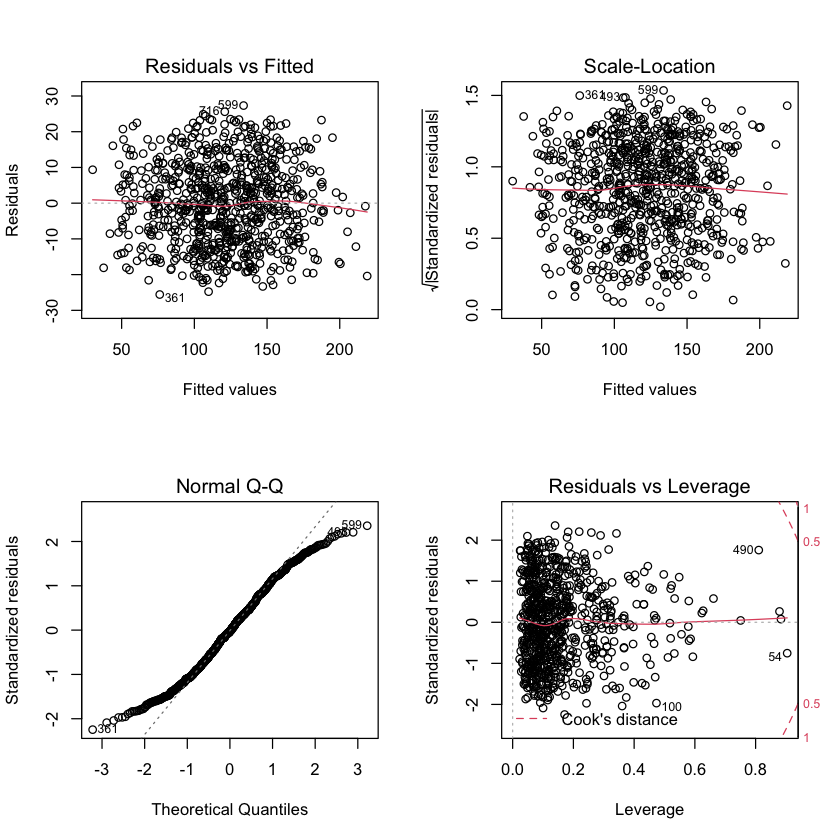

In [96]:
# Setting the plot grid
par(mfcol=c(2,2))

# Plotting the lm model
plot(poly.mod)

Looking at the above plots, we can already see an improvement in the normality of the residuals in the QQ plot. However, the results of the above plot are not very promising as they don't indicate a significant improvement from the linear model. But what about their individual confidence intervals? Let us have a look at them.

In [97]:
# Stacking up the confidence intervals of the model paramters
conf <- confint(poly.mod, level=0.95)

# Sorting by the 95% confidence intervals
conf[order(conf[, 2],decreasing=TRUE),]

,2.5 %,97.5 %
(Intercept),-104.243087,151.988495
is_urban,28.141011,74.301278
is_ac,10.669100,59.759233
num_rooms,-49.819104,55.138305
is_flat,-1.487973,43.916494
num_children,13.360193,41.360504
is_tv,-14.844408,39.173476
I(num_rooms^2),-26.733685,35.111835
num_rooms:is_tv,-9.761351,24.068094
num_rooms:is_flat,-8.141558,19.871560


Using the concept of forward stepwise regression, let us attempt to find the best subset to represent a non-linear relationship between the predictors and `amount_paid`.

Reordering variables and trying again:


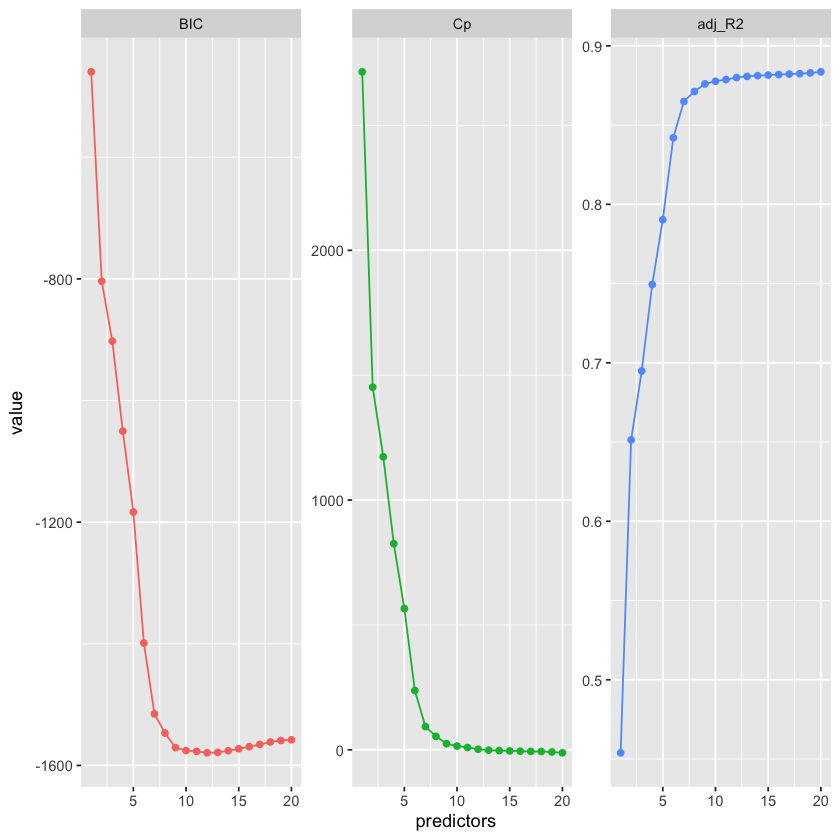

In [98]:
options(warn=-1)

# Performing forward stepwise selection
poly.forward <- regsubsets(amount_paid ~. *.* + I(num_rooms ^ 2) + I(num_people ^ 2) + I(housearea ^ 2) + I(is_ac ^ 2) + I(is_tv ^ 2) + I(is_flat ^ 2)
        + I(ave_monthly_income ^ 2) + I(num_children ^ 2) + I(is_urban ^ 2) + I(month ^ 2) + I(num_rooms ^ 3) + I(num_people ^ 3) + I(housearea ^ 3) + I(is_ac ^ 3) + I(is_tv ^ 3) + I(is_flat ^ 3)
        + I(ave_monthly_income ^ 3) + I(num_children ^ 3) + I(is_urban ^ 3) + I(month ^ 3), train, nvmax = 19, method = 'forward')
results_poly <- summary(poly.forward)

# Extracting and plotting the results of the selection process
tibble(predictors = 1:20,
       adj_R2 = results_poly$adjr2,
       Cp = results_poly$cp,
       BIC = results_poly$bic) %>%
        gather(statistic, value, -predictors) %>%
        ggplot(aes(predictors, value, color = statistic)) +
        geom_line(show.legend = F) +
        geom_point(show.legend = F) +
        facet_wrap(~ statistic, scales = "free")

options(warn = 0)

Next, we print the optimum number of predictors based on the values of $C_p$, BIC and Adjusted R squared.

In [99]:
# Printing the optimum subset size based on Cp value
which.min(results_poly$cp)

[1] 20

In [100]:
# Printing the optimum subset size based on bayesian estimate
which.min(results_poly$bic)

[1] 12

In [101]:
# Printing the optimum subset size based on the adjusted R squared value
which.max(results_poly$adjr2)

[1] 20

Even though we are going for best 2 out of 3, let us go ahead with the optimum subset size of 20 as per the value of $C_p$

In [102]:
# Printing the top 20 most favourable predictors
print(coef(poly.forward, 20))

                      (Intercept)                             is_ac 
                     4.741037e+01                      2.870845e+01 
                          is_flat                      num_children 
                     1.231525e+01                      2.735354e+01 
                   I(housearea^2)                    I(housearea^3) 
                     3.418445e-05                     -1.729543e-08 
                housearea:is_flat      housearea:ave_monthly_income 
                    -1.838391e-02                      5.406117e-07 
           housearea:num_children          is_ac:ave_monthly_income 
                    -1.345514e-02                      1.543500e-05 
               is_ac:num_children                       is_ac:month 
                     1.237159e+00                      5.918092e-01 
                   is_tv:is_urban              is_flat:num_children 
                     4.037057e+01                     -3.075234e-01 
                 is_flat:is_urban 

Now, let us train the model with these 20 predictors.

In [103]:
# Setting the seed for reproducibility
set.seed(1)

# Setting the training parameters
data_ctrl <- trainControl(method = "cv", number = 10)

# Training the model
best_sub_poly <- train(amount_paid ~ is_flat + I(housearea^2) + housearea:is_flat + housearea:num_children
+ is_ac:num_children + is_tv:is_urban + is_flat:is_urban + ave_monthly_income:num_children + num_people:I(num_rooms^2) + ave_monthly_income:I(num_rooms^2) + is_ac + num_children + I(housearea^3) + 
housearea:ave_monthly_income + is_ac:ave_monthly_income + is_ac:month + is_flat:num_children +
is_flat:month + ave_monthly_income:month + is_tv:I(num_rooms^2), data = train,
                     trControl = data_ctrl,
                     method = "lm",                      
                     na.action = na.pass)

# Displaying the model results 
best_sub_poly

Linear Regression 

780 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 703, 704, 701, 703, 701, 701, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  16.32937  0.7941775  13.23228

Tuning parameter 'intercept' was held constant at a value of TRUE

We are getting a poor RMSE score and Rsquared value compared to the linear model. This should confirm that the variables may not have a strong non-linear relationship with `amount_paid`. 

But Let us give this another try. The best subset model has indicated that the optimum number of predictors is 20. Let us try modeling the data with the top 20 predictors of the original polynomial model.

In [104]:
# Setting the seed for reproducibility
set.seed(1)

# Setting the training parameters
data_ctrl <- trainControl(method = "cv", number = 10)

# Training the model
best_sub_poly <- train(amount_paid ~ is_urban + num_children + is_ac + num_people:is_urban:I(num_rooms^2)
                  + housearea:is_urban + is_flat + is_ac:month + num_people:ave_monthly_income + 
                  num_people:month + housearea:is_tv:I(num_rooms^2) + ave_monthly_income:is_urban:I(num_rooms^2)
                  + is_ac:is_urban:I(num_rooms^2) + num_rooms:num_people:I(num_rooms^2) + 
                  num_people:is_ac + is_flat:num_children + num_children:I(num_rooms^2) + 
                  is_ac:is_tv + housearea:is_ac:I(num_rooms^2) + is_tv:ave_monthly_income +
                  is_ac:num_children + is_ac:ave_monthly_income:I(num_rooms^2)
                  , data = train,
                     trControl = data_ctrl,
                     method = "lm",                      
                     na.action = na.pass)

# Displaying the model performance
best_sub_poly

Linear Regression 

780 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 703, 704, 701, 703, 701, 701, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  12.75075  0.8762579  10.83679

Tuning parameter 'intercept' was held constant at a value of TRUE

In [105]:
# Recording the RMSE
mod_perf[5, 'rmse'] = round(best_sub_poly$results[1, 2], 4)

In [106]:
# Printing the model summary
summary(best_sub_poly)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.7169 -10.4962  -0.1898   9.8546  26.5310 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   4.188e+01  1.881e+00  22.265
is_urban                                      4.305e+01  3.732e+00  11.535
num_children                                  1.855e+01  9.517e-01  19.490
is_ac                                         2.709e+01  4.009e+00   6.758
is_flat                                       1.172e+01  1.385e+00   8.463
`is_urban:housearea`                          8.768e-03  4.330e-03   2.025
`is_ac:month`                                 4.199e-01  3.902e-01   1.076
`num_people:ave_monthly_income`               7.391e-06  2.092e-05   0.353
`num_people:month`                            3.687e-02  4.259e-02   0.866
`is_ac:num_people`                            2.966e-01  4.622e-01   0.642
`num_child

We have an improved Rsquared value as opposed to the linear model but the ultimate decision must be made on the RMSE. 

### 4.4 Final Model Selection and Prediction

Let us observe the RMSE score of all the models implemented in this activity.

In [107]:
# Comparing the model Results
mod_perf

Model,rmse
<chr>,<dbl>
Multiple Linear Regression,12.55890
Lasso Regression,12.65701
Random Forest,14.12250
Best Subset,12.54740
Non-Linear,12.75070


Although there isn't really a clear winner in terms of the regression models, we can base our decision on the RMSE score from the cross validation process applied to the models. Based on the RMSE of each model, the best subset linear model is the clear winner. Therefore, this will be our final model.

It must be said so that despite the linearity of the variables with respect to `amount_paid`, based on the root mean squared error, it may be argued that these variables also share an almost equally significant non-linear relationship with `amount_paid`.

Let us go ahead with our selected model and predict the test data.

In [108]:
# Making a copy of the test data
t <- test

# Predicting on the test data
t$pre <- predict(best_sub_mod, test[-11])

# Computing the RMSE
cat('The root mean squared error of the best subset model is:', round(rmse(t$pre, t$amount_paid), 4))

The root mean squared error of the best subset model is: 12.9772

Finally, let us plot the fitted values against the observed values for `amount_paid` to visualise the performance of the model. 

`geom_smooth()` using formula 'y ~ x'



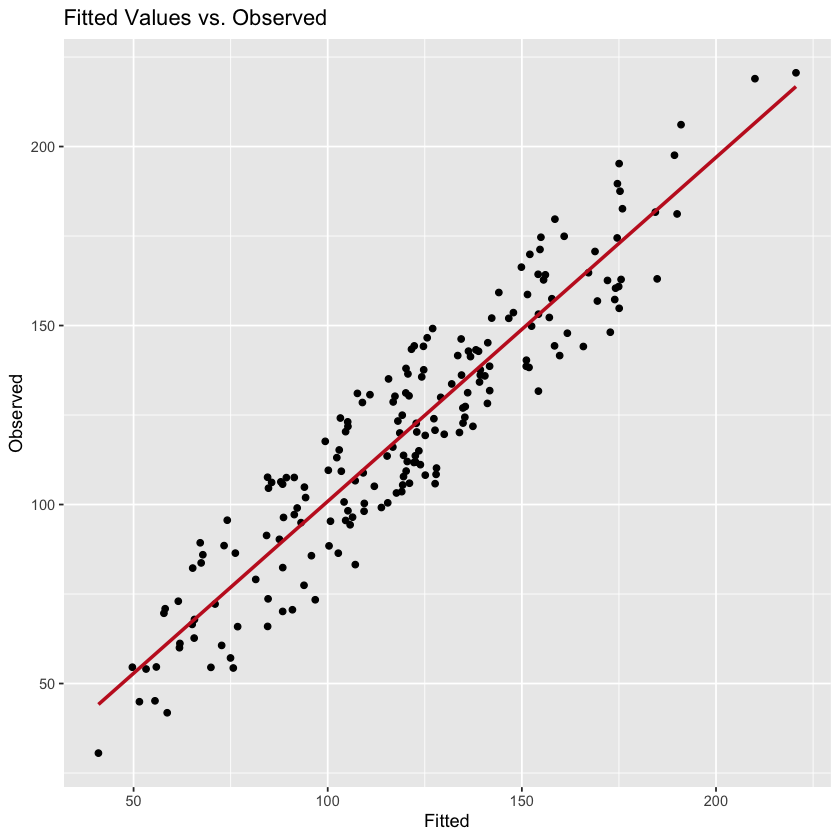

In [109]:
# Plotting the Observed values vs. the fitted values
ggplot(t, aes(x = pre, y = amount_paid)) +
    geom_point() +
    stat_smooth(method = "lm",
        col = "#C42126",
        se = FALSE,
        size = 1) + ggtitle('Fitted Values vs. Observed') +
  xlab("Fitted") + ylab("Observed")

On observing the below plot, we can see that this model has fit the data well overall. However, there are a number of supervised models to be experimented with. There is a lot of scope to improve the performance by building a better model.

## 5. Inference<a class="anchor" id="sec_7"></a>

In the previous section, we identified the most significant predictors for `amount_paid` by using the linear model selection and Stepwise regression. In this section, let us understand what we mean by these relationships. Since we used the training data to fit the model, we can use it here to understand the relationship these predictors share with the target variable.

Based on the results of the stepwise selection, the following attributes were identified as important in no particular order:

* is_urban
* num_people 
* housearea 
* is_ac 
* is_tv 
* is_flat 
* ave_monthly_income 
* num_children

As mentioned earlier, when we say that these attributes are significant, it means that a unit change in each of these variables affects the value of the electricity amount paid in an extreme manner. But what does this imply on a statistical level? Why have these attributes been chosen to be a part of the best subset. Let us understand this phenomenon with the help of a few visualisations. 

### 5.1 Scatter plots

First, let us observe the top 2 important predictors `is_urban` and `num_children` and their relationship with the electricity bill amount. Then, for comparison, we can observe one of the less important predictors called `ave_monthly_income` to understand how it affects the amount paid.

Having said that, let us start by using a function called `pairs()`. This function returns a plot matrix containing all the variable dependencies from the data.

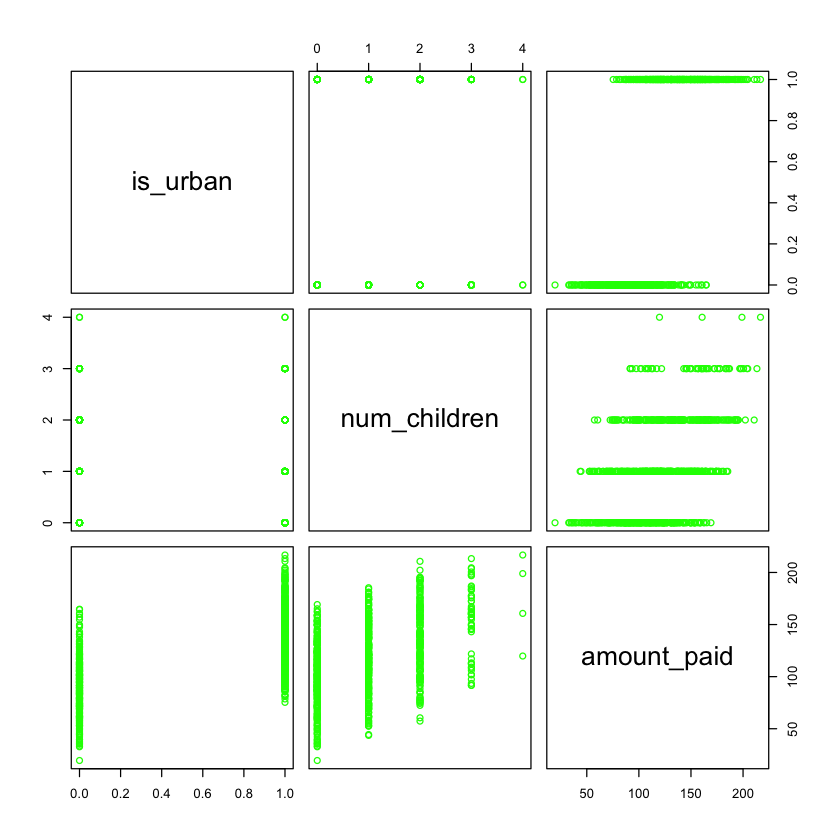

In [110]:
# Plotting variable pairs with is_urban and num_children
pairs(~ is_urban + num_children + amount_paid, data = train, col = "green")

The correlation between `is_urban` and `amount_paid` is given in the top right box of the last column. Looking at it, one can understand how this column affects `amount_paid`. Given that `is_urban` is a categorical column, it shows exteme separation of values for 0 and 1. This means that a change in the is urban attribute drastically increases or decreases the electricity bill amount on average.

Let us observe this scatterplot in detail.

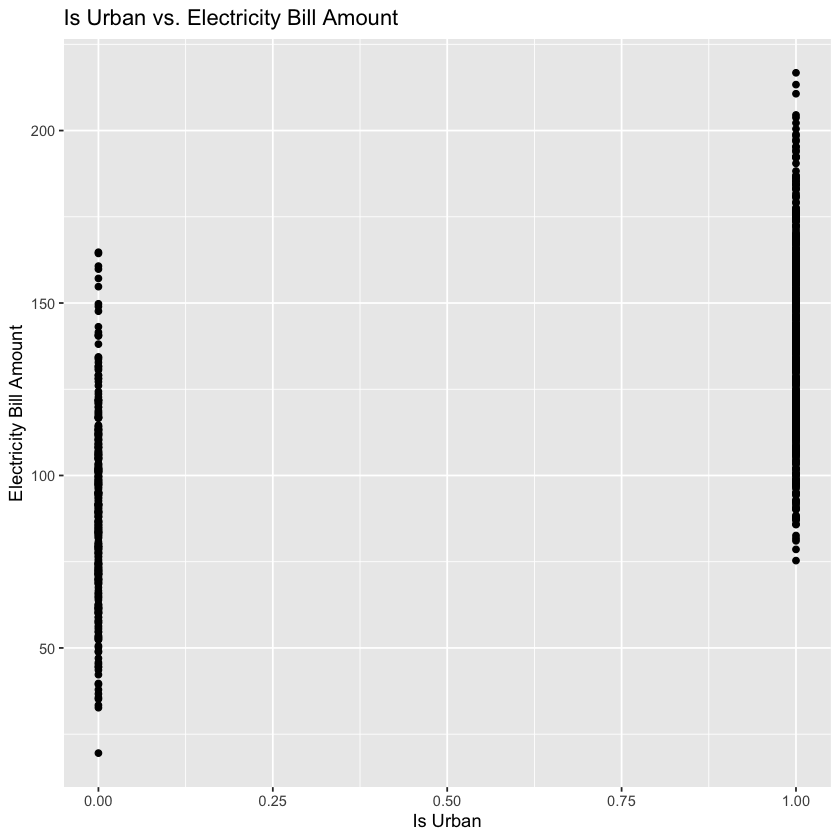

In [111]:
# Plotting is_urban vs amount_paid
ggplot(train, aes(x= is_urban, y = amount_paid)) + 
    geom_point() + ggtitle('Is Urban vs. Electricity Bill Amount') + xlab('Is Urban') + 
ylab('Electricity Bill Amount')

If we look back to part c of `section 2.1.1`, we observed that the mean electricity bill amount being paid in urban areas is more than half the electricity bill amount being paid in rural areas. This indicates that the consumption of electricity is much higher in urban areas.

Let us observe the relationship of `num_children` with `amount_paid`. As confirmed by the coefficients of the linear model, this attribute is less significant than `is_urban`. However, note the relationship as shown in the second box in the bottom row. 

Even though the `num_children` column is not a categorical variable, we have extreme or limited discrete values for the number of children. Therefore, a change in the number of children on average is induces a significant change in the bill amount. This is the relationship which underlines the significance for `num_children`.

Therefore, we can conclude that the electricity bill amount is likely to be higher if the number of children in the household is greater. Let us see the scatter plot in detail to observe this relationship.

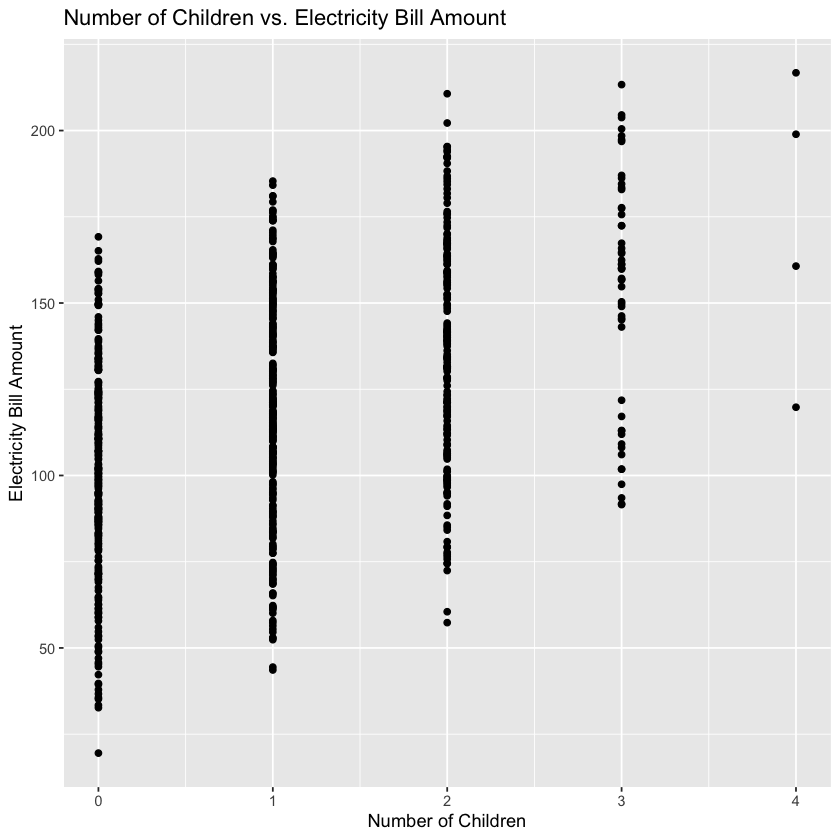

In [112]:
# Plotting num_children vs amount_paid
ggplot(train, aes(x= num_children, y = amount_paid)) + 
    geom_point() + ggtitle('Number of Children vs. Electricity Bill Amount') + xlab('Number of Children') + 
ylab('Electricity Bill Amount')

Now, to compare the significance of these relationships, let us observe the relationship of one of the less significant variables `ave_monthly_income` with `amount_paid`. Note that this attribute has been identified as one of the essential predictors in the subset selection process. This is because it works with the more important variables to predict the amount paid value efficiently. On its own, it is not important enough to predict amount paid. What does this mean? let us explore that here.

However, it is less significant than `is_urban` and `num_children`. This is the reason why it would be good to observe how it affects `amount_paid` to compare it with the more important predictors.

Here is a scatterplot between the average monthly income and the amount paid.

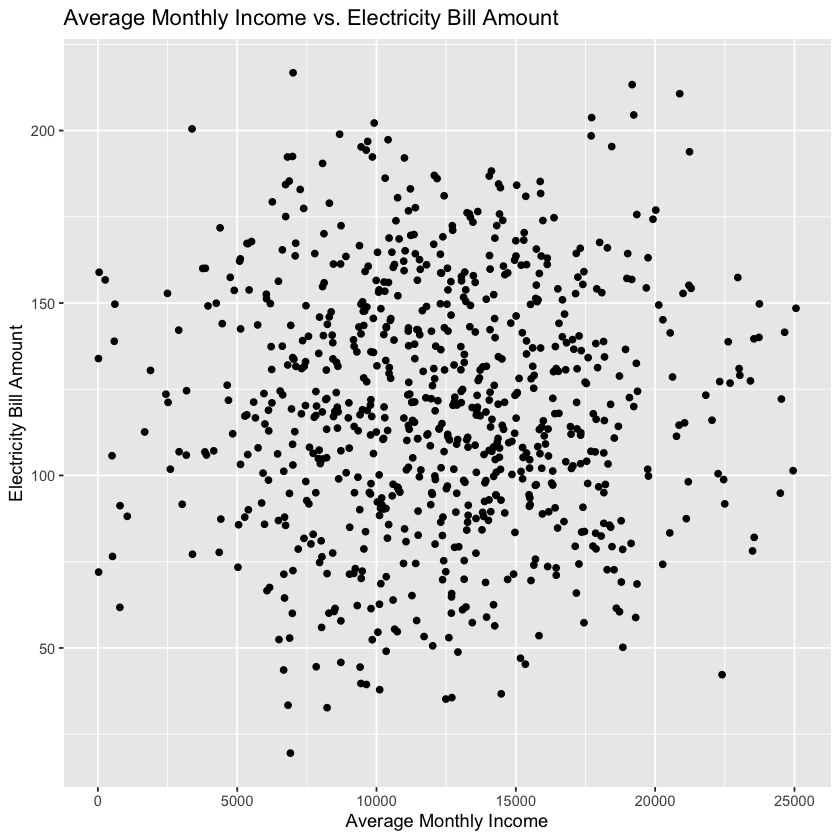

In [113]:
# Plotting ave_monthly_income vs amount_paid
ggplot(train, aes(x= ave_monthly_income, y = amount_paid)) + 
geom_point() + 
ggtitle('Average Monthly Income vs. Electricity Bill Amount') + 
xlab('Average Monthly Income') + 
ylab('Electricity Bill Amount')

Observe the scatter plot for the average monthly income versus the amount paid. It paints a much different picture from the plot for is urban and number of children. There seems to be no discernable pattern in the spread of values. This indicates poor correlation with amount paid. Therefore, one unit change in the average monthly income will likely not introduce a significant change in the electricity amount to be paid.

Therefore, we can conclude average monthly income of a household does not hugely affect the electricity bill amount.

Let us use the `featurePlot()` function to stack up every variable against `amount_paid` with a reference line. From the most important predictor to the least important predictor, observe how the shape, direction and spread of values changes and becomes more uncertain as we go through the 8 predictors.

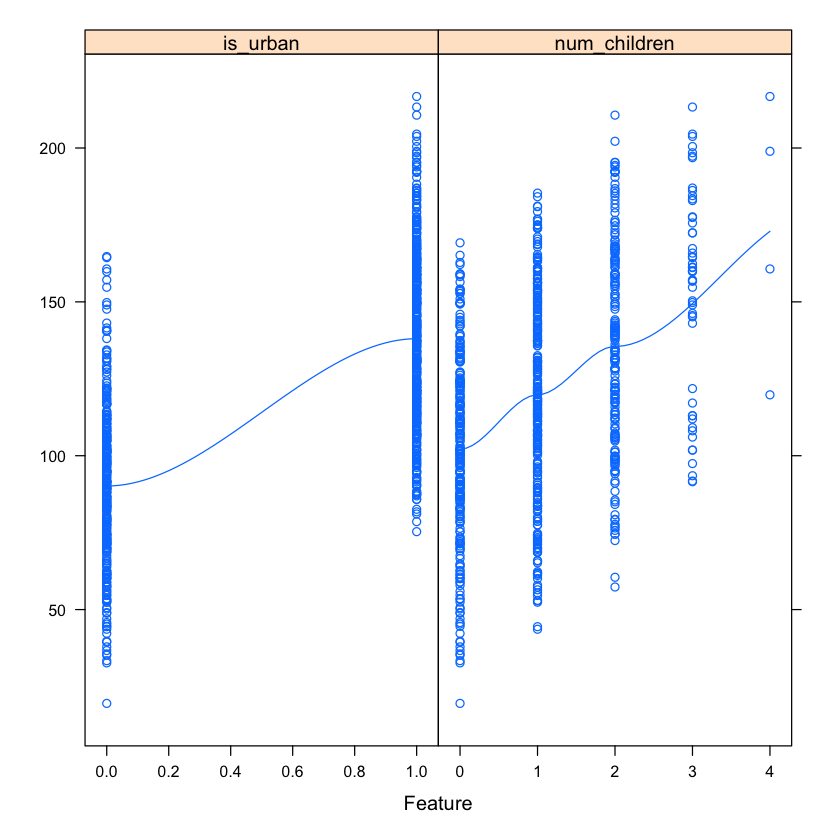

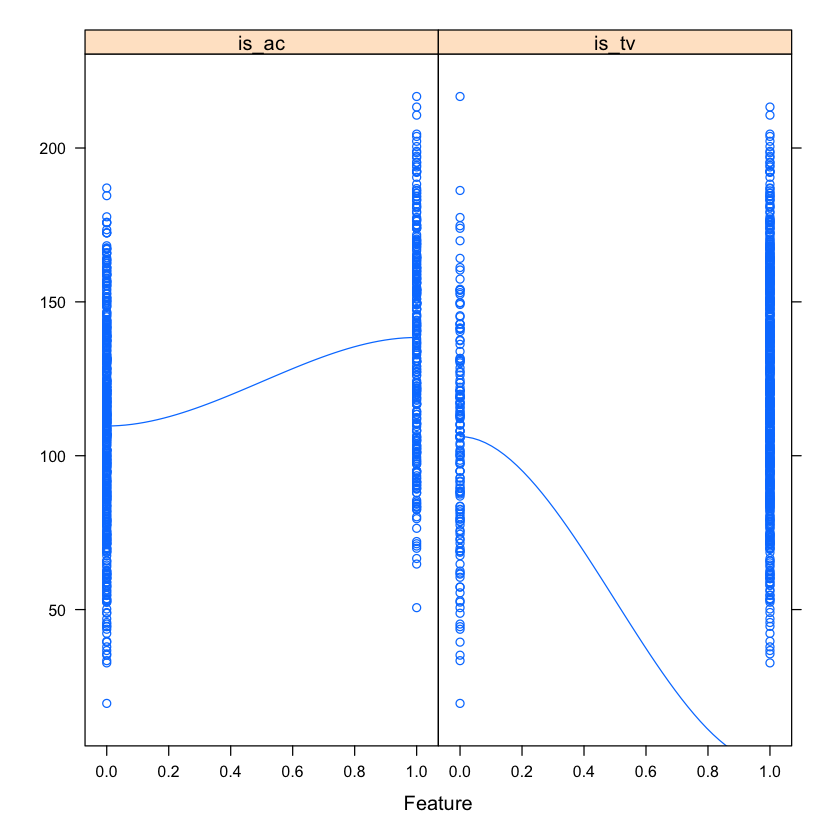

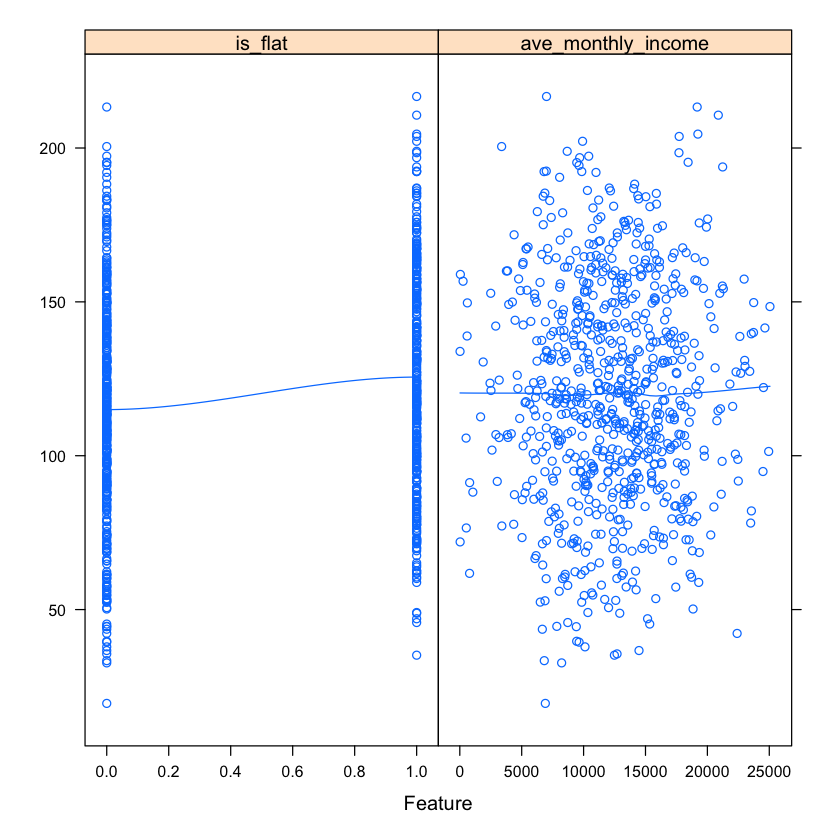

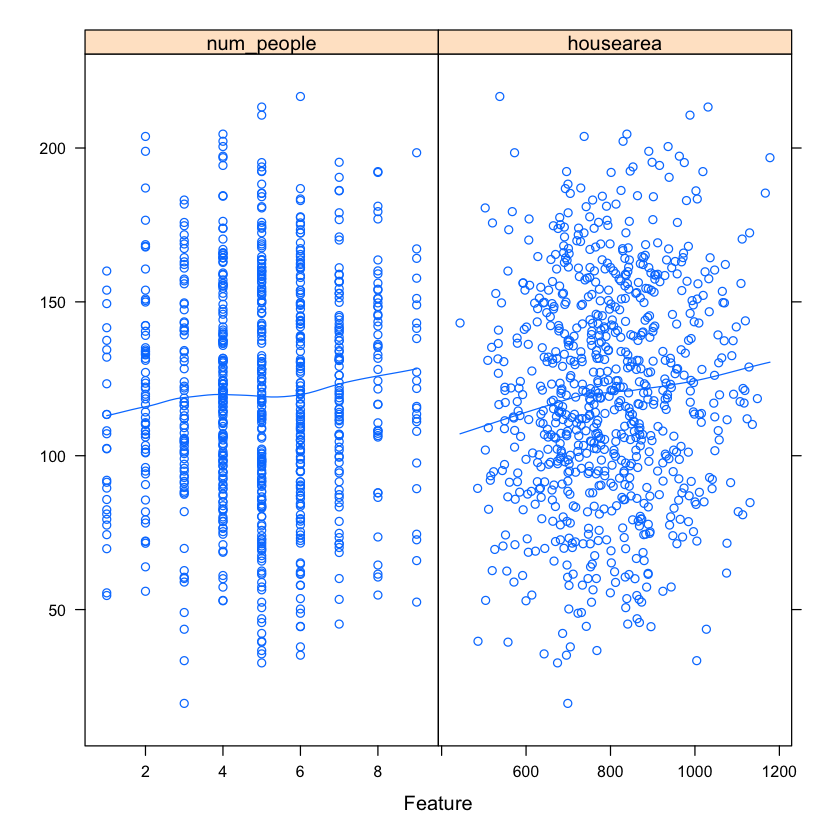

In [114]:
options(warn=-1)

# Feature Plots for each variable 
featurePlot(x = train[, c(9, 8, 4, 5, 6, 7, 2, 3)], 
            y = train[, 11], 
            plot = "scatter",
            type = c("p", "smooth"),
            #span = .5,
            layout = c(2, 1))

options(warn=0)

In this section, we understood why some predictors are more important than others in terms of predicting the electricity bill amount in our model. In the next section, we will quantify this relationship between the input variables and the target variable with the help of the correlation coefficient.

### 5.2 Correlation

We talked a lot about relationship between the predictors and the amount paid where the word correlation came up occasionally. In simple terms, **Correlation** explains how one or more variables are related to each other. There are three ways in which the correlation between two variables may be quantified:

* **Positive Correlation**: Two variables are said to be positively correlated when one unit increase in one variable induces a unit increase the other variable.

* **Negative Correlation**: Two variables are said to be negatively correlated when one unit increase in one variable induces a unit decrease the other variable.

* **No Correlation**: Two variables are said to have poor correlation when any change in one variable does not affect any change in the other variable.

The score for determining the correlation between two variables lies between -1 and 1. If the score is closer to -1, the two variables are said to be negatively correlated. If the score is closer to 1, the two variables are said to be positively correlated. A score which is closer to 0 suggests poor correlation.

To observe the correlation between different variables with each other and the target variable `amount_paid`, let us create a correlation matrix in the form of a heatmap plot. The colour blue indicates a strong correlation between the two variables and the colour green indicates poor or no correlation.

The correlation method being used here is `Pearson's Correlation coefficient`. This is a linear correlation coefficient. It is suitable for describing the linearity of the relationship between two variables. However, it does not provide any information about the slope of the line. It is computed with the below formula:

$$
p=\frac{\sum\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sqrt{\sum\left(x_i-\bar{x}\right)^2 \sum\left(y_i-\bar{y}\right)^2}}
$$

Here, $p$ is the correlation coefficient, $x_i$ is the input variable, $y_i$ is the target variable, $\overline{x}$ is the mean of $x_i$ and $\overline{y}$ is the mean of $y_i$. (Glen, 2022)

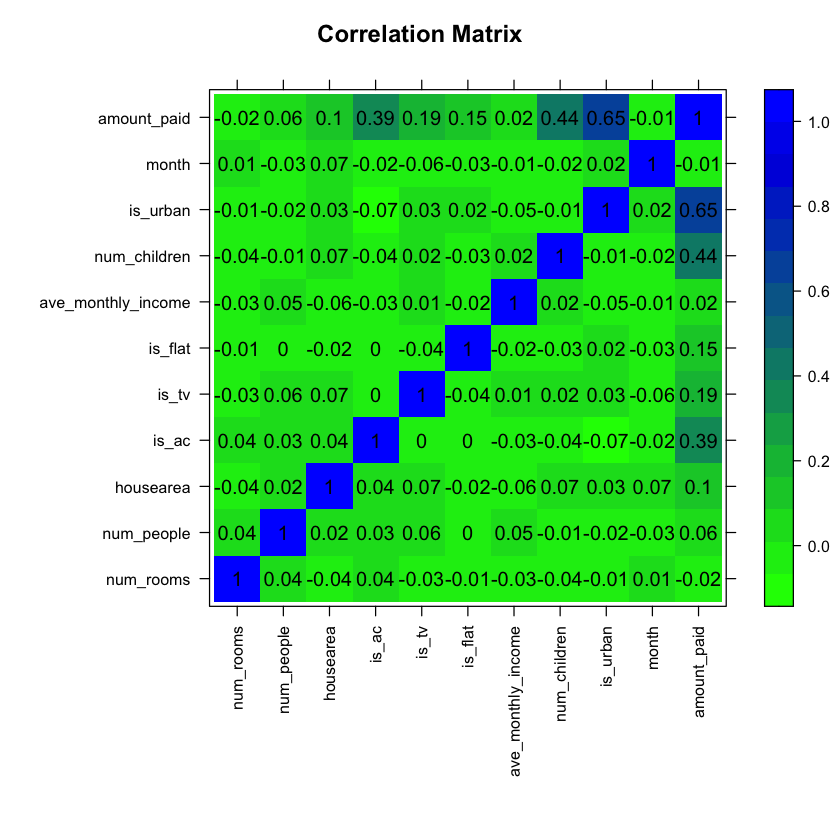

In [118]:
#Defining a custom panel for the heatmap
my.Panel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}

#Defining the color scheme for the correlation matrix
colour.pal = colorRampPalette(c("green","blue"))


#Ploting the correlation matrix.
levelplot(cor(train, method = 'pearson'), col.regions = colour.pal(100), main = "Correlation Matrix", 
          xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = my.Panel)

The above heatmap reaffirms the strong linear relationship some of these attributes have with the total electricity amount being paid. For example, the correlation between `is_urban` and `amount_paid` is 0.65, which is very strong positive correlation. This is in line with what we observed earlier for the bill amount in urban areas versus non-urban areas. This is folowed by `num_children` which also has a very strong positive correlation with `amount_paid`.

On the flipside, the correlation coefficient for `month` and `amount_paid` is 0. This means that the month of the year does not affect the electricity amount being paid in any way. This is the reason why it was not included in the best subset by the stepwise selection method. Similarly, the average monthly income is also poorly correlated with the electricity amount.

### 5.3 p-values

In the model development process we arranged the coefficients of the model in decreasing order of the t-statistic as it is more suitable for a smaller dataset. How about p-values? 

First, let us sort the coefficients of our best fit model in ascending order of p values:

In [116]:
# Ordering the coefficients of the model
best_sub_coef[order(best_sub_coef$p.value),]

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
is_urban,5.034688e+01,9.236870e-01,54.506429,1.092409e-266
num_children,1.810132e+01,4.841909e-01,37.384680,2.597421e-175
is_ac,3.354849e+01,9.298254e-01,36.080422,9.677982e-168
is_tv,1.454407e+01,1.137141e+00,12.790033,4.168920e-34
is_flat,1.129937e+01,8.983975e-01,12.577254,3.941756e-33
(Intercept),2.578499e+01,3.259659e+00,7.910334,8.902120e-15
ave_monthly_income,4.002244e-04,9.559092e-05,4.186846,3.154878e-05
num_people,9.775818e-01,2.419310e-01,4.040746,5.862105e-05
housearea,5.910709e-03,3.190640e-03,1.852515,6.433387e-02


As expected, we get the same order of coefficients of the model in decreasing order of their significance with `is_urban` being the most significant and housearea being the least significant. A p-value computes the probability of making an accurate prediction, assuming that the null hypothesis is true. A p value is calculated from the departure of the predicted value and the observed value subject to the probability distribution of the statistic. (Beers, 2022)

Therefore, a low p-value, such as the one observed for `is_urban` indicates that the null hypothesis can be discarded. For the model, this means that the predictor is statistically significant in terms of contributing to induce change in the target variable. In terms of correlation, we described this as a positive correlation.

In conclusion, the above inferences helped us reaffirm the inclusion of these 8 predictors in the final model. Having said that, some datasets have a lot more uncertainty than this one and in that scenario, we may have to apply in depth inferential analysis to understand the relationships better.

## 6. Summary<a class="anchor" id="sec_7"></a>

In this activity, we performed the following tasks:

* Explored the data and preprocessed it.
* Fitted a model to the data
* Improved that model based on feature engineering and subset selection
* Made predictions and computed performance metrics for each model
* Described the relationship between the most important variables and the electricity bill amount being paid.

## 7. References <a class="anchor" id="sec_8"></a>

* RPubs - Random Forest Tunning in Caret. (n.d.). Rpubs.com. https://rpubs.com/phamdinhkhanh/389752
* Histogram with density curves in R. (2020, September 18). R CHARTS | a Collection of Charts and Graphs Made with the R Programming Language. https://r-charts.com/distribution/histogram-curves/
* Log-Normal Distribution. (2019). Investopedia. https://www.investopedia.com/terms/l/log-normal-distribution.asp
* Chen, H., Hu, X., & Yang, Z. (n.d.). Model Selection for Linear Regression Model. Jbhender.github.io. Retrieved September 15, 2022, from https://jbhender.github.io/Stats506/F17/Projects/Group21_Model_Selection.html
* Wikipedia Contributors. (2018, November 30). t-statistic. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/T-statistic
* Hayes, A. (n.d.). Stepwise Regression. Investopedia. https://www.investopedia.com/terms/s/stepwise-regression.asp#:~:text=Stepwise%20regression%20is%20the%20step
* Wikipedia Contributors. (2019b, November 5). Polynomial regression. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/Polynomial_regression
* Brownlee, J. (2016, March 24). Linear Regression for Machine Learning. Machine Learning Mastery. https://machinelearningmastery.com/linear-regression-for-machine-learning/#:~:text=Linear%20regression%20is%20a%20linear
* Lasso and Ridge Regression Tutorial. (n.d.). Www.datacamp.com. Retrieved September 18, 2022, from https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression#regularization
* Ando, T. (2007). Bayesian Predictive Information Criterion for the Evaluation of Hierarchical Bayesian and Empirical Bayes Models. Biometrika, 94(2), 443–458. https://www.jstor.org/stable/20441383#:~:text=A%20Bayesian%20predictive%20information%20criterion
* Glen, S. (2022). Correlation coefficient: simple definition, formula, easy steps. Statistics How To. https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/
* Beers, B. (2022, March 5). What P-Value Tells Us. Investopedia. https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the
* Wikipedia Contributors. (2022, January 30). Mallows’s Cp. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/Mallows%27s_Cp